In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from glob import glob
import seaborn as sns
import re

BASE_DIR = "./"

def average_by_epoch(df_list, x, y):
    epochs = [tuple(df['epoch'].tolist()) for df in df_list]
    assert len(set(epochs)) == 1
    xs = [df[x].tolist() for df in df_list]
    ys = [df[y].tolist() for df in df_list]

    xs = pd.DataFrame(xs).T.mean(axis=1).tolist()
    ys = pd.DataFrame(ys).T.mean(axis=1).tolist()

    df = pd.DataFrame(zip(xs, ys), columns=[x, y])

    return df

def read_adjusted_ppl():
    def concate(path):
        dfs = []
        paths = glob(path)
        for p in paths:
            p = pd.read_csv(p)
            dfs.append(p)
        df = pd.concat(dfs)
        return df
    df_valid = concate("../data/adjusted_metrics/valid_*.csv")
    df_test = concate("../data/adjusted_metrics/test_*.csv")
    df_valid = df_valid.drop_duplicates()
    df_test = df_test.drop_duplicates()
    return df_valid, df_test


def join_adjusted_ppl(path):
    df = pd.read_csv(p)
    df1 = pd.merge(df, DF_V, on='model_path')
    print(df1.shape[0], df.shape[0])
    assert df1.shape[0] == df.shape[0]
    return df1


DF_V, DF_T = read_adjusted_ppl()

COLORS = ['black', 'mediumseagreen', 'darkorange', 'blue']
MARKERS = ['.', '+', '^']
AVERAGE = True
LABEL = ['No DP', 'Full DP', 'S-DP']

72 72
72 72
72 72
72 72
72 72
101 101
101 101
101 101
101 101
101 101
150 150
150 150
150 150
150 150
150 150


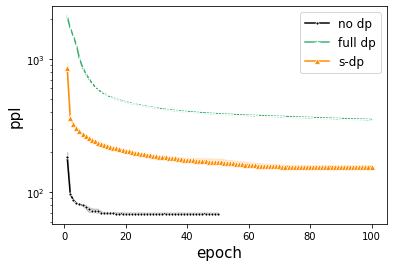

In [36]:
## ppl vs epoch
#nodp
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "nodp", "*.csv")):
    df_nodps.append(join_adjusted_ppl(p))
df_nodps = pd.concat(df_nodps)

#full dp
df_dps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "dp", "*.csv")):
    df_dps.append(join_adjusted_ppl(p))
df_dps = pd.concat(df_dps)

#partial dp
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "partialdp", "final_concat", "*.csv")):
    df_partialdps.append(join_adjusted_ppl(p))
df_partialdps = pd.concat(df_partialdps)


ax = sns.lineplot(x="epoch", y="overall_ppl", data=df_nodps[df_nodps.epoch!=0], color=COLORS[0], marker=MARKERS[0], label='no dp')
ax = sns.lineplot(x="epoch", y="overall_ppl", data=df_dps[df_dps.epoch!=0], color=COLORS[1], marker=MARKERS[1], label='full dp')
ax = sns.lineplot(x="epoch", y="overall_ppl", data=df_partialdps[df_partialdps.epoch!=0], color=COLORS[2], marker=MARKERS[2], label='s-dp')
plt.legend(loc="upper right", prop={'size':12})
plt.xlabel('epoch', fontsize=15)
plt.ylabel('ppl', fontsize=15)
plt.yscale('log')

In [81]:
#nodp
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "nodp", "*.csv")):
    df_nodps.append(join_adjusted_ppl(p))

72 72
72 72
72 72
72 72
72 72


In [82]:
df_nodps[0].head()

,epoch,model_ppl,model_acc,model_epsilon,model_delta,model_alpha,canary_exposure,canary_rank,canary_ppl,TOTAL_CANDIDATES,model_path,overall_ppl,overall_acc,nonprivate_ppl,nonprivate_acc,private_ppl,private_acc
0,0,49790.630093,0.00000,0.0,0.0,0.0,1.001328,499540,50218.709372,1000000,model/nodp/20210418/210231/data-wikitext-2-add...,49790.214424,0.000000,49777.306708,0.000000,50238.648644,0.000000
1,1,489.785579,0.23542,0.0,0.0,0.0,0.364539,776717,12805.027204,1000000,model/nodp/20210418/210231/data-wikitext-2-add...,489.882811,0.206934,448.323397,0.212227,10478.091763,0.024085
2,1,414.816291,0.24792,0.0,0.0,0.0,0.041171,971866,34592.139834,1000000,model/nodp/20210418/210231/data-wikitext-2-add...,414.900040,0.224298,382.477329,0.230041,6900.062032,0.025874
3,1,243.841459,0.30208,0.0,0.0,0.0,1.278479,412230,13870.763081,1000000,model/nodp/20210418/210231/data-wikitext-2-add...,243.904783,0.273147,224.496061,0.280264,4279.675038,0.027250
4,1,222.032150,0.30000,0.0,0.0,0.0,8.225073,3342,7072.065131,1000000,model/nodp/20210418/210231/data-wikitext-2-add...,222.002297,0.270793,205.568936,0.277787,3164.578150,0.029177


In [92]:
# for p in glob(os.path.join(BASE_DIR, "canary_insertion", "partialdp", "param_search", "lr0.1_sigma0.01_norm0.005_seed1111.csv")):
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "partialdp", "param_search", "*.csv")):
    df = join_adjusted_ppl(p)
    df_partialdps.append(df)

100 100
100 100
100 100
100 100
100 100
100 100
100 100
100 100
100 100
100 100
100 100
100 100
100 100
100 100
100 100
100 100


In [99]:
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "partialdp", "param_search", "*.csv")):
    df = join_adjusted_ppl(p)
    df_partialdps.append(df.iloc[-1:])
df_partialdps = pd.concat(df_partialdps)

100 100
100 100
100 100
100 100
100 100
100 100
100 100
100 100
100 100
100 100
100 100
100 100
100 100
100 100
100 100
100 100


In [100]:
df_partialdps

,epoch,model_ppl,model_acc,model_epsilon,model_delta,model_alpha,canary_exposure,canary_rank,canary_ppl,TOTAL_CANDIDATES,model_path,overall_ppl,overall_acc,nonprivate_ppl,nonprivate_acc,private_ppl,private_acc
99,50,253.149021,0.28571,1.632876e+08,0.00008,1.1,2.788654,144721,11734.614141,1000000,model/partialdp/20210423/111126/data-wikitext-...,253.358940,0.269949,244.606153,0.276452,8.536337e+02,0.045279
99,50,164.177520,0.33143,5.376000e+00,0.00008,3.6,0.375585,770793,78785.693177,1000000,model/partialdp/20210417/111003/data-wikitext-...,164.398874,0.301846,136.509557,0.310582,1.012270e+05,0.000000
99,50,171.748568,0.32000,5.376000e+00,0.00008,3.6,1.077860,473731,84931.046653,1000000,model/partialdp/20210419/064057/data-wikitext-...,171.943428,0.301970,130.489482,0.310710,2.370203e+06,0.000000
99,50,157.907468,0.32000,1.632876e+08,0.00008,1.1,0.772222,585515,65817.016840,1000000,model/partialdp/20210423/111051/data-wikitext-...,158.086189,0.303491,132.265950,0.312275,7.492452e+04,0.000000
99,50,337.353515,0.26857,1.320471e+05,0.00008,1.1,0.675542,626097,25264.096567,1000000,model/partialdp/20210423/111038/data-wikitext-...,337.844075,0.251731,324.858755,0.257861,1.308615e+03,0.039912
99,50,186.310824,0.30857,8.851000e+00,0.00008,2.7,0.168299,889891,115325.380726,1000000,model/partialdp/20210417/000742/data-wikitext-...,186.520187,0.295346,157.485425,0.303894,6.450967e+04,0.000000
99,50,161.510888,0.33143,8.851000e+00,0.00008,2.7,0.398041,758888,78081.408566,1000000,model/partialdp/20210417/000240/data-wikitext-...,161.685927,0.301904,134.257854,0.310642,9.953028e+04,0.000000
99,50,140.438794,0.33143,7.427057e+09,0.00008,1.1,17.346606,6,794.332134,1000000,model/partialdp/20210423/183122/data-wikitext-...,140.682294,0.305570,136.000923,0.312868,4.527557e+02,0.053493
99,50,167.231671,0.33143,3.648000e+00,0.00008,4.6,0.199741,870707,85805.406269,1000000,model/partialdp/20210417/000344/data-wikitext-...,167.426778,0.300963,138.791715,0.309674,1.092168e+05,0.000000
99,50,165.038937,0.32571,5.376000e+00,0.00008,3.6,0.701865,614777,93419.803486,1000000,model/partialdp/20210419/063839/data-wikitext-...,165.143120,0.303801,128.950933,0.312594,8.506286e+05,0.000000


In [105]:
df_partialdps

[    epoch   model_ppl  model_acc  model_epsilon  model_delta  model_alpha  \
 99     50  253.149021    0.28571   1.632876e+08      0.00008          1.1   
 99     50  164.177520    0.33143   5.376000e+00      0.00008          3.6   
 99     50  171.748568    0.32000   5.376000e+00      0.00008          3.6   
 99     50  157.907468    0.32000   1.632876e+08      0.00008          1.1   
 99     50  337.353515    0.26857   1.320471e+05      0.00008          1.1   
 99     50  186.310824    0.30857   8.851000e+00      0.00008          2.7   
 99     50  161.510888    0.33143   8.851000e+00      0.00008          2.7   
 99     50  167.231671    0.33143   3.648000e+00      0.00008          4.6   
 99     50  165.038937    0.32571   5.376000e+00      0.00008          3.6   
 99     50  192.174806    0.32000   5.376000e+00      0.00008          3.6   
 99     50  170.913760    0.31429   5.376000e+00      0.00008          3.6   
 99     50  172.552713    0.32000   5.376000e+00      0.00008   

73 73
73 73
73 73
73 73
73 73
100 100
100 100
100 100
100 100
100 100
100 100
100 100
100 100
100 100
100 100
100 100
100 100
100 100
100 100
100 100
100 100


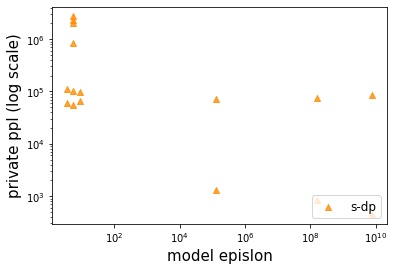

In [111]:
from matplotlib import colors as mcolors



#nodp
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "nodp_normalized_nomiss", "*.csv")):
    df_nodps.append(join_adjusted_ppl(p))
# df_nodps = pd.concat(df_nodps)

#full dp
# df_dps = []
# for p in glob(os.path.join(BASE_DIR, "canary_insertion", "dp", "*.csv")):
#     df_dps.append(join_adjusted_ppl(p))
# # df_dps = pd.concat(df_dps)

#partial dp
#
# /home/wyshi/privacy/attacks/canary_insertion/partialdp/param_search/lr0.1_sigma0.01_norm0.005_seed1111.csv
df_partialdps = []
# for p in glob(os.path.join(BASE_DIR, "canary_insertion", "partialdp", "final_concat", "*.csv")):
# for p in glob(os.path.join(BASE_DIR, "canary_insertion", "partialdp", "param_search", "lr0.1_sigma0.01_norm0.005_seed1111.csv")):
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "partialdp", "param_search", "*.csv")):
    if True:#"sigma0.01" not in p:
        df = join_adjusted_ppl(p)
        df_partialdps.append(df.iloc[-1:])
df_partialdps = pd.concat(df_partialdps)
# df_partialdps = df_partialdps[df_partialdps.model_epsilon <= 1e6]
df_partialdps = [df_partialdps]


dot_size=1
alpha = 0.8
x_var = 'model_epsilon'
metrics = 'private_ppl'#'inference_zlip_acc'#'inference_gpt2_acc'#'inference_ppl_acc'#'inference_lower_ppl_acc'#'inference_ppl_acc'

NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*4

fig = plt.figure()
ax = fig.add_subplot(111)

plot_func = plt.scatter

# average
if False:
    df_nodps = [average_by_epoch(df_nodps, x_var, metrics)]
    df_dps = [average_by_epoch(df_dps, x_var, metrics)]
    df_partialdps = [average_by_epoch(df_partialdps, x_var, metrics)]



# for i, df_nodp in enumerate(df_nodps):
#     plot_func(df_nodp[x_var].tolist()[1:], df_nodp[metrics].tolist()[1:], color=COLORS[0], #s=dot_size, 
#     alpha=alpha, label='no dp', marker=MARKERS[0])


# for i, df_dp in enumerate(df_dps):
#     plot_func(df_dp[x_var].tolist()[1:], df_dp[metrics].tolist()[1:], color=COLORS[1], #s=dot_size, 
#     alpha=alpha, label='full dp', marker=MARKERS[1])



for i, df_partialdp in enumerate(df_partialdps):
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    label = "s-dp"
    # label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    scatters = plot_func(df_partialdp[x_var], df_partialdp[metrics], color=COLORS[2], #s=dot_size, 
    alpha=alpha, label=label, marker=MARKERS[2])
    # scatters.set_color(cm(i//3*3.0/NUM_COLORS))



# plt.hlines(0.5, xmin=0, xmax=2000)
plt.legend(loc="lower right", prop={'size':12})
plt.yscale('log')
plt.xscale('log')
plt.xlabel('model epislon', fontsize=15)
plt.ylabel('private ppl (log scale)', fontsize=15)
plt.show()

73 73
73 73
73 73
73 73
73 73
100 100


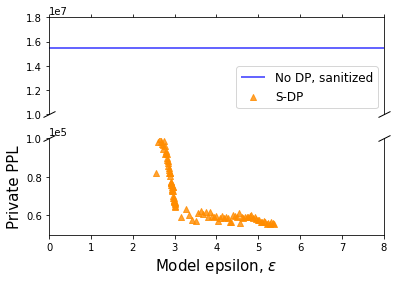

In [36]:
from matplotlib import colors as mcolors



#nodp
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "nodp_normalized_nomiss", "*.csv")):
    df_nodps.append(join_adjusted_ppl(p))
# df_nodps = pd.concat(df_nodps)

#full dp
# df_dps = []
# for p in glob(os.path.join(BASE_DIR, "canary_insertion", "dp", "*.csv")):
#     df_dps.append(join_adjusted_ppl(p))
# # df_dps = pd.concat(df_dps)

#partial dp
#
# /home/wyshi/privacy/attacks/canary_insertion/partialdp/param_search/lr0.1_sigma0.01_norm0.005_seed1111.csv
df_partialdps = []
# for p in glob(os.path.join(BASE_DIR, "canary_insertion", "partialdp", "final_concat", "*.csv")):
# for p in glob(os.path.join(BASE_DIR, "canary_insertion", "partialdp", "param_search", "lr0.1_sigma0.01_norm0.005_seed1111.csv")):
# for p in glob(os.path.join(BASE_DIR, "canary_insertion", "partialdp", "param_search", "lr0.1_sigma0.1_norm0.005_seed1111.csv")):
# for p in glob(os.path.join(BASE_DIR, "canary_insertion", "partialdp", "param_search", "lr0.1_sigma0.45_norm0.005_seed1111.csv")):
# for p in glob(os.path.join(BASE_DIR, "canary_insertion", "partialdp", "lr0.1_sigma0.5_norm0.001_seed1111.csv")):
# for p in glob(os.path.join(BASE_DIR, "canary_insertion, "partialdp", "param_search", "*.csv")):
# for p in glob(os.path.join(BASE_DIR, "canary_insertion", "partialdp", "param_search", "lr0.1_sigma0.1_norm0.25_seed1111.csv")):
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "partialdp", "param_search", "lr0.1_sigma0.5_norm0.01_seed1111.csv")):
    if True:#"sigma0.01" not in p:
        df = join_adjusted_ppl(p)
        df_partialdps.append(df)



dot_size=1
alpha = 0.8
x_var = 'model_epsilon'
metrics = 'private_ppl'#'inference_zlip_acc'#'inference_gpt2_acc'#'inference_ppl_acc'#'inference_lower_ppl_acc'#'inference_ppl_acc'




# average
if True:
    df_nodps = [average_by_epoch(df_nodps, x_var, metrics)]
    # df_dps = [average_by_epoch(df_dps, x_var, metrics)]
    # df_partialdps = [average_by_epoch(df_partialdps, x_var, metrics)]





fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0.25)  # adjust space between axes


plot_func = ax1.scatter
plot_func2 = ax2.scatter



# plot the same data on both axes
for i, df_nodp in enumerate(df_nodps):
    ax1.hlines(df_nodp[metrics].tolist()[-1:], xmin=0, xmax=8, color=COLORS[3], alpha=alpha, label='No DP, sanitized')
    ax2.hlines(df_nodp[metrics].tolist()[-1:], xmin=0, xmax=8, color=COLORS[3], alpha=alpha, label='No DP, sanitized')
    # plot_func(df_nodp[x_var].tolist()[-1:], df_nodp[metrics].tolist()[-1:], color=COLORS[0], #s=dot_size, 
    # alpha=alpha, label='no dp', marker=MARKERS[0])


# for i, df_dp in enumerate(df_dps):
#     plot_func(df_dp[x_var].tolist()[1:], df_dp[metrics].tolist()[1:], color=COLORS[1], #s=dot_size, 
#     alpha=alpha, label='full dp', marker=MARKERS[1])



for i, df_partialdp in enumerate(df_partialdps):
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    label = "S-DP, $\sigma=0.5$, C=0.01"
    # label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    scatters = plot_func(df_partialdp[x_var].tolist()[1:], df_partialdp[metrics].tolist()[1:], color=COLORS[2], #s=dot_size, 
    alpha=alpha, label=label, marker=MARKERS[2])
    scatters = plot_func2(df_partialdp[x_var].tolist()[1:], df_partialdp[metrics].tolist()[1:], color=COLORS[2], #s=dot_size, 
    alpha=alpha, label=label, marker=MARKERS[2])
    # scatters.set_color(cm(i//3*3.0/NUM_COLORS))




# zoom-in / limit the view to different portions of the data
ax1.set_ylim(10000_000,18000_000)  # outliers only
ax2.set_ylim(50000,100_000)  # most of the data

ax1.set_xlim(0,8)  # outliers only
ax2.set_xlim(0,8)  # most of the data

# hide the spines between ax and ax2
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()









# plt.hlines(0.5, xmin=0, xmax=2000)
ax1.legend(loc="lower right", prop={'size':12})
# plt.yscale('log')
plt.xlabel('Model epsilon, $\epsilon$ ', fontsize=15)
ax2.set_ylabel('Private PPL', fontsize=15)

ax1.ticklabel_format(style='sci')
ax2.ticklabel_format(style='sci')

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.show()

In [18]:
df_nodp[metrics].tolist()[-1:]

[15473433.689834077]

In [13]:
df_partialdp[metrics].max(),df_partialdp[metrics].min()

(99577.78834589412, 50234.57894601227)

In [80]:
df_nodps

[    epoch   private_ppl
 0     0.0  50244.753156
 1     1.0  11388.149058
 2     1.0   6200.747393
 3     1.0   4236.111196
 4     1.0   3268.192387
 ..    ...           ...
 67   46.0    516.651887
 68   47.0    516.651887
 69   48.0    516.651887
 70   49.0    516.651887
 71   50.0    516.651887
 
 [72 rows x 2 columns]]

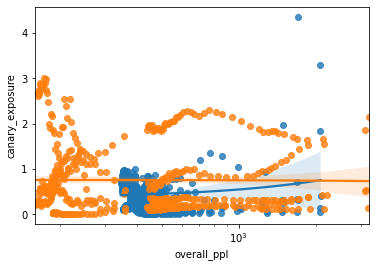

In [77]:
## Canary insertion
#nodp
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "nodp", "*.csv")):
    df_nodps.append(join_adjusted_ppl(p))
df_nodps = pd.concat(df_nodps)

#full dp
df_dps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "dp", "*.csv")):
    df_dps.append(join_adjusted_ppl(p))
df_dps = pd.concat(df_dps)

#partial dp
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "partialdp", "final_concat", "*.csv")):
    df_partialdps.append(join_adjusted_ppl(p))
df_partialdps = pd.concat(df_partialdps)

xvar = 'overall_ppl'
yvar = 'canary_exposure'
plotfunc = sns.regplot
df1 = df_nodps[df_nodps.epoch!=0]
df2 = df_dps[df_dps.epoch!=0]
df3 = df_partialdps[df_partialdps.epoch!=0]

# ax = plotfunc(x=xvar, y=yvar, data=df1)
ax = plotfunc(x=xvar, y=yvar, data=df2)
ax = plotfunc(x=xvar, y=yvar, data=df3)
plt.xscale('log')

72 72
72 72
72 72
72 72
72 72
101 101
101 101
101 101
101 101
101 101
150 150
150 150
150 150
150 150
150 150
100 100
150 150
100 100


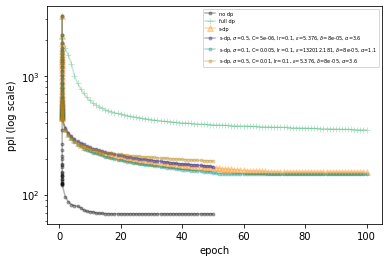

In [8]:
from matplotlib import colors as mcolors


default_colors = list(dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS).keys())[8:]

default_colors = ['darkblue',
 'darkcyan',
 'darkgoldenrod',
 'darkgray',
 'darkgreen',
 'darkgrey',
 'darkkhaki',
 'darkmagenta',
 'darkolivegreen',
 'darkorange',
 'darkorchid',
 'darkred',
 'darksalmon',
 'darkseagreen',
 'darkslateblue',
 'darkslategray',
 'darkslategrey',
 'darkturquoise',
 'darkviolet']

#nodp
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "nodp", "*.csv")):
    df_nodps.append(join_adjusted_ppl(p))
# df_nodps = pd.concat(df_nodps)

#full dp
df_dps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "dp", "*.csv")):
    df_dps.append(join_adjusted_ppl(p))
# df_dps = pd.concat(df_dps)

#partial dp
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "partialdp", "final_concat", "*.csv")):
    df_partialdps.append(join_adjusted_ppl(p))
# df_partialdps = pd.concat(df_partialdps)


dot_size=1
alpha = 0.3
x_var = 'epoch'
metrics = 'overall_ppl'#'inference_zlip_acc'#'inference_gpt2_acc'#'inference_ppl_acc'#'inference_lower_ppl_acc'#'inference_ppl_acc'

NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*4

fig = plt.figure()
ax = fig.add_subplot(111)

plot_func = plt.plot

# average
if AVERAGE:
    df_nodps = [average_by_epoch(df_nodps, x_var, metrics)]
    df_dps = [average_by_epoch(df_dps, x_var, metrics)]
    df_partialdps = [average_by_epoch(df_partialdps, x_var, metrics)]



for i, df_nodp in enumerate(df_nodps):
    plot_func(df_nodp[x_var].tolist()[1:], df_nodp[metrics].tolist()[1:], color=COLORS[0], #s=dot_size, 
    alpha=alpha, label='no dp', marker=MARKERS[0])


for i, df_dp in enumerate(df_dps):
    plot_func(df_dp[x_var].tolist()[1:], df_dp[metrics].tolist()[1:], color=COLORS[1], #s=dot_size, 
    alpha=alpha, label='full dp', marker=MARKERS[1])



for i, df_partialdp in enumerate(df_partialdps):
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    label = "s-dp"
    # label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    scatters = plot_func(df_partialdp[x_var].tolist()[1:], df_partialdp[metrics].tolist()[1:], color=COLORS[2], #s=dot_size, 
    alpha=alpha, label=label, marker=MARKERS[2])
    # scatters.set_color(cm(i//3*3.0/NUM_COLORS))


# for other parameters
#partial dp
df_partialdps_params = []
for p in glob(os.path.join(BASE_DIR, "membership_inference/partialdp/final_fix/param_search", "*.csv")):
    try:
        if ("sigma0.1_norm0.005_seed1111_100epochs" in p) or ("sigma0.5_norm0.01" in p) or ("sigma0.5_norm5e-06" in p):
            df_partialdps_params.append(join_adjusted_ppl(p))
    except:
        print(p)
# df_partialdps = pd.concat(df_partialdps)


for i, df_partialdp_param in enumerate(df_partialdps_params):
    matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp_param.iloc[-1]['model_path'])
    lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    # label = "s-dp"
    label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp_param.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp_param.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp_param.iloc[-1]['model_alpha']}"
    scatters = plot_func(df_partialdp_param[x_var].tolist()[1:], df_partialdp_param[metrics].tolist()[1:], color=default_colors[i], #s=dot_size, 
    alpha=alpha, label=label, marker=MARKERS[0])
    # scatters.set_color(cm(i//3*3.0/NUM_COLORS))



# plt.hlines(0.5, xmin=0, xmax=2000)
plt.legend(loc="upper right", prop={'size':5})
plt.yscale('log')
plt.xlabel('epoch')
plt.ylabel('ppl (log scale)')
plt.show()

In [29]:
glob(os.path.join(BASE_DIR, "membership_inference/partialdp/final_fix/param_search", "*.csv"))

['./membership_inference/partialdp/final_fix/param_search/lr0.1_sigma0.05_norm0.25_seed1111.csv',
 './membership_inference/partialdp/final_fix/param_search/lr0.1_sigma0.5_norm0.005_seed1111.csv',
 './membership_inference/partialdp/final_fix/param_search/lr0.1_sigma0.5_norm5e-06_seed1111.csv',
 './membership_inference/partialdp/final_fix/param_search/lr0.1_sigma0.5_norm5e-05_seed1111.csv',
 './membership_inference/partialdp/final_fix/param_search/lr0.1_sigma0.05_norm0.005_seed1111.csv',
 './membership_inference/partialdp/final_fix/param_search/lr0.1_sigma0.1_norm0.25_seed1111.csv',
 './membership_inference/partialdp/final_fix/param_search/lr0.1_sigma0.1_norm0.005_seed1111_100epochs.csv',
 './membership_inference/partialdp/final_fix/param_search/lr0.1_sigma0.45_norm0.01_seed1111.csv',
 './membership_inference/partialdp/final_fix/param_search/lr0.1_sigma0.45_norm0.005_seed1111.csv',
 './membership_inference/partialdp/final_fix/param_search/lr0.1_sigma0.01_norm0.25_seed1111.csv',
 './membe

72 72
72 72
72 72
72 72
72 72
101 101
101 101
101 101
101 101
101 101
150 150
150 150
150 150
150 150
150 150
72 72
72 72
72 72
72 72
72 72
101 101
101 101
101 101
101 101
101 101
150 150
150 150
150 150
150 150
150 150


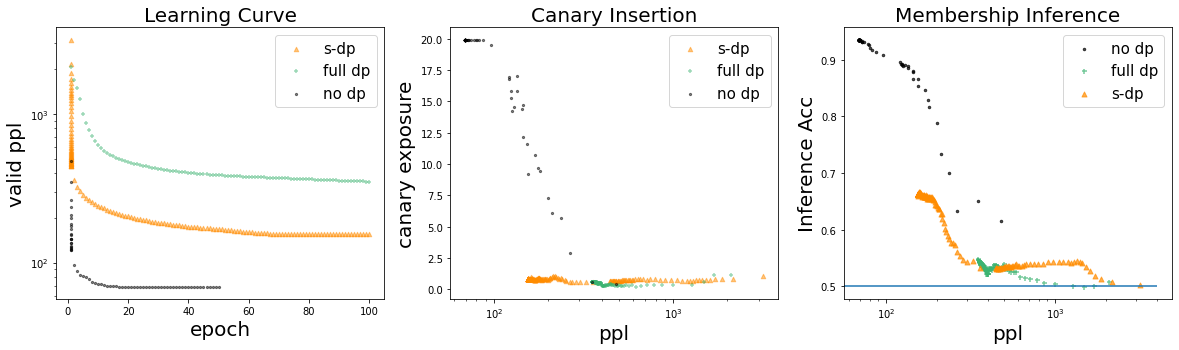

In [73]:
#nodp
title_fontsize = 20
label_font_size = 20
legend_fontsize = 15

##########################################################
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "nodp", "*.csv")):
    df_nodps.append(join_adjusted_ppl(p))
# df_nodps = pd.concat(df_nodps)

#full dp
df_dps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "dp", "*.csv")):
    df_dps.append(join_adjusted_ppl(p))
# df_dps = pd.concat(df_dps)

#partial dp
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "partialdp", "final_concat", "*.csv")):
    df_partialdps.append(join_adjusted_ppl(p))
# df_partialdps = pd.concat(df_partialdps)


dot_size=20
alpha = 0.5
x_var = 'overall_ppl'
metrics = 'canary_exposure'#'inference_zlip_acc'#'inference_gpt2_acc'#'inference_ppl_acc'#'inference_lower_ppl_acc'#'inference_ppl_acc'

NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*4

fig, (ax3, ax1, ax2) = plt.subplots(1, 3, figsize=(20,5))


plot_func1 = ax1.scatter
plot_func2 = ax2.scatter
plot_func3 = ax3.scatter

# average
if AVERAGE:
    x_var1 = 'overall_ppl'
    metrics1 = 'canary_exposure'
    
    x_var3 = 'epoch'
    metrics3 = 'overall_ppl'
    
    df_nodps1 = [average_by_epoch(df_nodps, x_var1, metrics1)]
    df_dps1 = [average_by_epoch(df_dps, x_var1, metrics1)]
    df_partialdps1 = [average_by_epoch(df_partialdps, x_var1, metrics1)]

    df_nodps3 = [average_by_epoch(df_nodps, x_var3, metrics3)]
    df_dps3 = [average_by_epoch(df_dps, x_var3, metrics3)]
    df_partialdps3 = [average_by_epoch(df_partialdps, x_var3, metrics3)]



for i, df_partialdp in enumerate(df_partialdps3):
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    label = "s-dp"
    # label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    scatters = plot_func3(df_partialdp[x_var3].tolist()[1:], df_partialdp[metrics3].tolist()[1:], color=COLORS[2], s=dot_size, alpha=alpha, label=label, marker=MARKERS[2])
    # scatters.set_color(cm(i//3*3.0/NUM_COLORS))


for i, df_dp in enumerate(df_dps3):
    plot_func3(df_dp[x_var3].tolist()[1:], df_dp[metrics3].tolist()[1:], color=COLORS[1], s=dot_size, alpha=alpha, label='full dp', marker=MARKERS[1])


for i, df_nodp in enumerate(df_nodps3):
    plot_func3(df_nodp[x_var3].tolist()[1:], df_nodp[metrics3].tolist()[1:], color=COLORS[0], s=dot_size, alpha=alpha, label='no dp', marker=MARKERS[0])


# plt.hlines(0.5, xmin=0, xmax=2000)
ax3.set_title('Learning Curve', fontsize=title_fontsize)

ax3.legend(loc="upper right", prop={'size':legend_fontsize})
ax3.set_yscale('log')
ax3.set_xlabel('epoch', fontsize=label_font_size)
ax3.set_ylabel('valid ppl', fontsize=label_font_size)

#####################################################################################
for i, df_partialdp in enumerate(df_partialdps1):
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    label = "s-dp"
    # label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    scatters = plot_func1(df_partialdp[x_var1].tolist()[1:], df_partialdp[metrics1].tolist()[1:], color=COLORS[2], s=dot_size, alpha=alpha, label=label, marker=MARKERS[2])
    # scatters.set_color(cm(i//3*3.0/NUM_COLORS))


for i, df_dp in enumerate(df_dps1):
    plot_func1(df_dp[x_var1].tolist()[1:], df_dp[metrics1].tolist()[1:], color=COLORS[1], s=dot_size, alpha=alpha, label='full dp', marker=MARKERS[1])


for i, df_nodp in enumerate(df_nodps1):
    plot_func1(df_nodp[x_var1].tolist()[1:], df_nodp[metrics1].tolist()[1:], color=COLORS[0], s=dot_size, alpha=alpha, label='no dp', marker=MARKERS[0])


# plt.hlines(0.5, xmin=0, xmax=2000)
ax1.set_title('Canary Insertion', fontsize=title_fontsize)

ax1.legend(loc="upper right", prop={'size':legend_fontsize})
ax1.set_xscale('log')
ax1.set_xlabel('ppl', fontsize=label_font_size)
ax1.set_ylabel('canary exposure', fontsize=label_font_size)

####################################################################################
# membership inference
#nodp
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "nodp", "final_fix", "*.csv")):
    df_nodps.append(join_adjusted_ppl(p))
# df_nodps = pd.concat(df_nodps)

#full dp
df_dps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dp", "final_fix", "*.csv")):
    df_dps.append(join_adjusted_ppl(p))
# df_dps = pd.concat(df_dps)

#partial dp
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "partialdp", "final_concat", "*.csv")):
    df_partialdps.append(join_adjusted_ppl(p))
# df_partialdps = pd.concat(df_partialdps)


dot_size=25
alpha = 0.7
x_var = 'overall_ppl'
metrics = 'inference_ppl_acc'#'inference_zlip_acc'#'inference_gpt2_acc'#'inference_ppl_acc'#'inference_lower_ppl_acc'#'inference_ppl_acc'

NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*4




ax2.hlines(0.5, xmin=0, xmax=4000)

# average
if AVERAGE:
    df_nodps = [average_by_epoch(df_nodps, x_var, metrics)]
    df_dps = [average_by_epoch(df_dps, x_var, metrics)]
    df_partialdps = [average_by_epoch(df_partialdps, x_var, metrics)]




for i, df_nodp in enumerate(df_nodps):
    plot_func2(df_nodp[x_var].tolist()[1:], df_nodp[metrics].tolist()[1:], color=COLORS[0], s=dot_size, alpha=alpha, label='no dp', marker=MARKERS[0])


for i, df_dp in enumerate(df_dps):
    plot_func2(df_dp[x_var].tolist()[1:], df_dp[metrics].tolist()[1:], color=COLORS[1], s=dot_size, alpha=alpha, label='full dp', marker=MARKERS[1])


for i, df_partialdp in enumerate(df_partialdps):
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    label = "s-dp"
    # label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    scatters = plot_func2(df_partialdp[x_var].tolist()[1:], df_partialdp[metrics].tolist()[1:], color=COLORS[2], s=dot_size, alpha=alpha, label=label, marker=MARKERS[2])
    # scatters.set_color(cm(i//3*3.0/NUM_COLORS))

ax2.set_title('Membership Inference', fontsize=title_fontsize)
ax2.legend(loc="upper right", prop={'size':legend_fontsize})
ax2.set_xscale('log')
ax2.set_xlabel('ppl', fontsize=label_font_size)
ax2.set_ylabel('Inference Acc', fontsize=label_font_size)

plt.show()





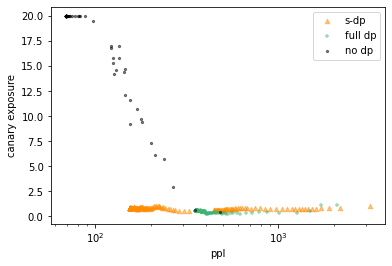

In [63]:
#nodp
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "nodp", "*.csv")):
    df_nodps.append(join_adjusted_ppl(p))
# df_nodps = pd.concat(df_nodps)

#full dp
df_dps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "dp", "*.csv")):
    df_dps.append(join_adjusted_ppl(p))
# df_dps = pd.concat(df_dps)

#partial dp
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "partialdp", "final_concat", "*.csv")):
    df_partialdps.append(join_adjusted_ppl(p))
# df_partialdps = pd.concat(df_partialdps)


dot_size=20
alpha = 0.5
x_var = 'overall_ppl'
metrics = 'canary_exposure'#'inference_zlip_acc'#'inference_gpt2_acc'#'inference_ppl_acc'#'inference_lower_ppl_acc'#'inference_ppl_acc'

NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*4

fig = plt.figure()
ax = fig.add_subplot(111)

plot_func = ax.scatter

# average
if AVERAGE:
    df_nodps = [average_by_epoch(df_nodps, x_var, metrics)]
    df_dps = [average_by_epoch(df_dps, x_var, metrics)]
    df_partialdps = [average_by_epoch(df_partialdps, x_var, metrics)]



for i, df_partialdp in enumerate(df_partialdps):
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    label = "s-dp"
    # label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    scatters = plot_func(df_partialdp[x_var].tolist()[1:], df_partialdp[metrics].tolist()[1:], color=COLORS[2], s=dot_size, alpha=alpha, label=label, marker=MARKERS[2])
    # scatters.set_color(cm(i//3*3.0/NUM_COLORS))


for i, df_dp in enumerate(df_dps):
    plot_func(df_dp[x_var].tolist()[1:], df_dp[metrics].tolist()[1:], color=COLORS[1], s=dot_size, alpha=alpha, label='full dp', marker=MARKERS[1])


for i, df_nodp in enumerate(df_nodps):
    plot_func(df_nodp[x_var].tolist()[1:], df_nodp[metrics].tolist()[1:], color=COLORS[0], s=dot_size, alpha=alpha, label='no dp', marker=MARKERS[0])







# plt.hlines(0.5, xmin=0, xmax=2000)
plt.legend(loc="upper right", prop={'size':10})
plt.xscale('log')
plt.xlabel('ppl')
plt.ylabel('canary exposure')
plt.show()

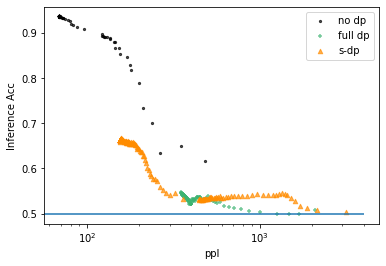

In [57]:
# membership inference
#nodp
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "nodp", "final_fix", "*.csv")):
    df_nodps.append(join_adjusted_ppl(p))
# df_nodps = pd.concat(df_nodps)

#full dp
df_dps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dp", "final_fix", "*.csv")):
    df_dps.append(join_adjusted_ppl(p))
# df_dps = pd.concat(df_dps)

#partial dp
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "partialdp", "final_concat", "*.csv")):
    df_partialdps.append(join_adjusted_ppl(p))
# df_partialdps = pd.concat(df_partialdps)


dot_size=20
alpha = 0.7
x_var = 'overall_ppl'
metrics = 'inference_ppl_acc'#'inference_zlip_acc'#'inference_gpt2_acc'#'inference_ppl_acc'#'inference_lower_ppl_acc'#'inference_ppl_acc'

NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*4

fig = plt.figure()
ax = fig.add_subplot(111)

plot_func = ax.scatter
plt.hlines(0.5, xmin=0, xmax=4000)

# average
if AVERAGE:
    df_nodps = [average_by_epoch(df_nodps, x_var, metrics)]
    df_dps = [average_by_epoch(df_dps, x_var, metrics)]
    df_partialdps = [average_by_epoch(df_partialdps, x_var, metrics)]




for i, df_nodp in enumerate(df_nodps):
    plot_func(df_nodp[x_var].tolist()[1:], df_nodp[metrics].tolist()[1:], color=COLORS[0], s=dot_size, alpha=alpha, label='no dp', marker=MARKERS[0])


for i, df_dp in enumerate(df_dps):
    plot_func(df_dp[x_var].tolist()[1:], df_dp[metrics].tolist()[1:], color=COLORS[1], s=dot_size, alpha=alpha, label='full dp', marker=MARKERS[1])


for i, df_partialdp in enumerate(df_partialdps):
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    label = "s-dp"
    # label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    scatters = plot_func(df_partialdp[x_var].tolist()[1:], df_partialdp[metrics].tolist()[1:], color=COLORS[2], s=dot_size, alpha=alpha, label=label, marker=MARKERS[2])
    # scatters.set_color(cm(i//3*3.0/NUM_COLORS))


plt.legend(loc="upper right", prop={'size':10})
plt.xscale('log')
plt.xlabel('ppl')
plt.ylabel('Inference Acc')
plt.show()

73 73
73 73
73 73
73 73
73 73
150 150
150 150
150 150
150 150
150 150


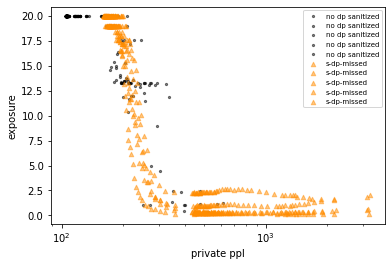

In [39]:
# missed experiments
#nodp normalized

df_nodps_normalized = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "nodp_normalized", "*")):
    df_nodps_normalized.append(join_adjusted_ppl(p))

#partial dp missed
df_partialdps_missed = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "partialdp_missed", "*")):
    df_partialdps_missed.append(join_adjusted_ppl(p))





# missed
dot_size=20
alpha = 0.5
# x_var, y_var = "canary_ppl", "canary_exposure"
# x_var, y_var = "private_ppl", "canary_exposure"
# x_var, y_var = "epoch", "private_ppl"
x_var, y_var = "overall_ppl", "canary_exposure"




# average
if False:
    # df_nodps_normalized_miss1 = [average_by_epoch(df_nodps_normalized_miss1, x_var, y_var)]
    df_nodps_normalized = [average_by_epoch(df_nodps_normalized, x_var, y_var)]
    df_partialdps_missed = [average_by_epoch(df_partialdps_missed, x_var, y_var)]



NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*3

fig = plt.figure()
ax = fig.add_subplot(111)

plot_func = ax.scatter


# for i, df_nodp_normalized_miss1 in enumerate(df_nodps_normalized_miss1):
#     plot_func(df_nodp_normalized_miss1[x_var].tolist()[1:], df_nodp_normalized_miss1[y_var].tolist()[1:], color='grey', marker=MARKERS[0], s=dot_size, alpha=alpha, label='no dp sanitized miss 1')


for i, df_nodp_normalized in enumerate(df_nodps_normalized):
    plot_func(df_nodp_normalized[x_var].tolist()[1:], df_nodp_normalized[y_var].tolist()[1:], color=COLORS[0], marker=MARKERS[0], s=dot_size, alpha=alpha, label='no dp sanitized')




for i, df_partialdp in enumerate(df_partialdps_missed):
    df_partialdp = df_partialdp.iloc[:100]
    label = "s-dp-missed"
    # label = f"s-dp-missed, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    if True:
        scatters = plot_func(df_partialdp[x_var].tolist()[1:], df_partialdp[y_var].tolist()[1:], color=COLORS[2], marker=MARKERS[2], s=dot_size, alpha=alpha, label=label)
        # scatters.set_color(cm(i//1*1.0/NUM_COLORS))





# plot_func(df_partial025[x_var].tolist()[1:], df_partial025[y_var].tolist()[1:], color='pink', s=dot_size, alpha=alpha)

# plot_func(151, 0.5, color='red')
# plot_func(120, 0.5, color='red')

plt.legend(loc="upper right", prop={'size':7})
plt.xscale('log')
plt.xlabel('private ppl')
plt.ylabel('exposure')
plt.show()

In [10]:
    df = pd.read_csv('./canary_insertion/partialdp_missed_1/lr0.1_sigma0.5_norm0.001_seed123.csv')
    df1 = pd.merge(df, DF_V, on='model_path')


In [13]:
set(df['model_path']) - set(df1['model_path'])

{'model/partialdp/20210506/234042/data-wikitext-2-add1b_model-LSTM_ebd-200_hid-200_bi-False_lay-1_tie-False_tok-50258_bs-7_bptt-35_lr-0.1_dp-True_partial-True_0hidden-False_sigma-0.5_norm-0.001_dl-8e-05.pt_ppl-172.1362021_acc-0.30066_epoch-100_ep-6.948_dl-8e-05_ap-3.30'}

73 73
73 73
73 73
73 73
73 73
150 150
150 150
150 150
150 150
150 150


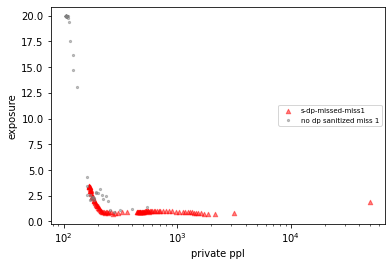

In [31]:
# missed experiments, miss 1
#nodp normalized
df_nodps_normalized_miss1 = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "nodp_normalized_miss1", "*")):
    df_nodps_normalized_miss1.append(join_adjusted_ppl(p))

#nodp normalized
df_partialdps_missed_miss1 = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "partialdp_missed_1", "*.csv")):
    try:
        df_partialdps_missed_miss1.append(join_adjusted_ppl(p))
    except:
        print(p)

# missed
dot_size=20
alpha = 0.5
# x_var, y_var = "private_ppl", "canary_exposure"
# x_var, y_var = "epoch", "private_ppl"
x_var, y_var = "overall_ppl", "canary_exposure"




# average
if True:
    # pass
    df_nodps_normalized_miss1 = [average_by_epoch(df_nodps_normalized_miss1, x_var, y_var)]
    df_partialdps_missed_miss1 = [average_by_epoch(df_partialdps_missed_miss1, x_var, y_var)]



NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*3

fig = plt.figure()
ax = fig.add_subplot(111)

plot_func = ax.scatter



for i, df_partialdp in enumerate(df_partialdps_missed_miss1):
    df_partialdp = df_partialdp.iloc[:100]
    label = "s-dp-missed-miss1"
    # label = f"s-dp-missed, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    if True:
        scatters = plot_func(df_partialdp[x_var].tolist(), df_partialdp[y_var].tolist(), color='red', marker=MARKERS[2], s=dot_size, alpha=alpha, label=label)

for i, df_nodp_normalized_miss1 in enumerate(df_nodps_normalized_miss1):
    plot_func(df_nodp_normalized_miss1[x_var].tolist()[1:], df_nodp_normalized_miss1[y_var].tolist()[1:], color='grey', marker=MARKERS[0], s=dot_size, alpha=alpha, label='no dp sanitized miss 1')




# plot_func(df_partial025[x_var].tolist()[1:], df_partial025[y_var].tolist()[1:], color='pink', s=dot_size, alpha=alpha)

# plot_func(151, 0.5, color='red')
# plot_func(120, 0.5, color='red')

plt.legend(loc="right", prop={'size':7})
plt.xscale('log')
plt.xlabel('private ppl')
plt.ylabel('exposure')
plt.show()

73 73
73 73
73 73
73 73
73 73
150 150
122 122


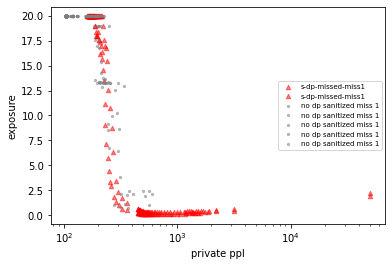

In [33]:
# missed experiments, append
#nodp normalized
df_nodps_normalized_miss1 = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "nodp_normalized_append10", "*.csv")):
    df_nodps_normalized_miss1.append(join_adjusted_ppl(p))

#nodp normalized
df_partialdps_missed_miss1 = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "partialdp_missed_append", "*.csv")):
    try:
        df_partialdps_missed_miss1.append(join_adjusted_ppl(p))
    except:
        print(p)

# missed
dot_size=20
alpha = 0.5
# x_var, y_var = "private_ppl", "canary_exposure"
# x_var, y_var = "epoch", "private_ppl"
x_var, y_var = "overall_ppl", "canary_exposure"




# average
if False:
    # pass
    df_nodps_normalized_miss1 = [average_by_epoch(df_nodps_normalized_miss1, x_var, y_var)]
    df_partialdps_missed_miss1 = [average_by_epoch(df_partialdps_missed_miss1, x_var, y_var)]



NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*3

fig = plt.figure()
ax = fig.add_subplot(111)

plot_func = ax.scatter



for i, df_partialdp in enumerate(df_partialdps_missed_miss1):
    df_partialdp = df_partialdp.iloc[:100]
    label = "s-dp-missed-miss1"
    # label = f"s-dp-missed, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    if True:
        scatters = plot_func(df_partialdp[x_var].tolist(), df_partialdp[y_var].tolist(), color='red', marker=MARKERS[2], s=dot_size, alpha=alpha, label=label)

for i, df_nodp_normalized_miss1 in enumerate(df_nodps_normalized_miss1):
    plot_func(df_nodp_normalized_miss1[x_var].tolist()[1:], df_nodp_normalized_miss1[y_var].tolist()[1:], color='grey', marker=MARKERS[0], s=dot_size, alpha=alpha, label='no dp sanitized miss 1')




# plot_func(df_partial025[x_var].tolist()[1:], df_partial025[y_var].tolist()[1:], color='pink', s=dot_size, alpha=alpha)

# plot_func(151, 0.5, color='red')
# plot_func(120, 0.5, color='red')

plt.legend(loc="right", prop={'size':7})
plt.xscale('log')
plt.xlabel('private ppl')
plt.ylabel('exposure')
plt.show()

73 73
73 73
73 73
73 73
73 73
137 137
135 135


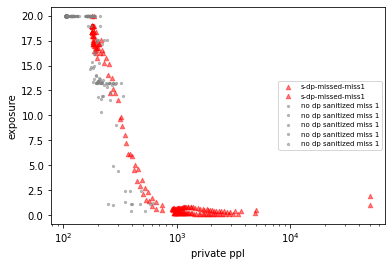

In [34]:
# missed experiments, both unk and digits
#nodp normalized
df_nodps_normalized_miss1 = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "nodp_normalized", "*.csv")):
    df_nodps_normalized_miss1.append(join_adjusted_ppl(p))

#nodp normalized
df_partialdps_missed_miss1 = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "partialdp_missed_both_unk_digits", "*.csv")):
    try:
        df_partialdps_missed_miss1.append(join_adjusted_ppl(p))
    except:
        print(p)

# missed
dot_size=20
alpha = 0.5
# x_var, y_var = "private_ppl", "canary_exposure"
# x_var, y_var = "epoch", "private_ppl"
x_var, y_var = "overall_ppl", "canary_exposure"




# average
if False:
    # pass
    df_nodps_normalized_miss1 = [average_by_epoch(df_nodps_normalized_miss1, x_var, y_var)]
    df_partialdps_missed_miss1 = [average_by_epoch(df_partialdps_missed_miss1, x_var, y_var)]



NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*3

fig = plt.figure()
ax = fig.add_subplot(111)

plot_func = ax.scatter



for i, df_partialdp in enumerate(df_partialdps_missed_miss1):
    df_partialdp = df_partialdp.iloc[:100]
    label = "s-dp-missed-miss1"
    # label = f"s-dp-missed, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    if True:
        scatters = plot_func(df_partialdp[x_var].tolist(), df_partialdp[y_var].tolist(), color='red', marker=MARKERS[2], s=dot_size, alpha=alpha, label=label)

for i, df_nodp_normalized_miss1 in enumerate(df_nodps_normalized_miss1):
    plot_func(df_nodp_normalized_miss1[x_var].tolist()[1:], df_nodp_normalized_miss1[y_var].tolist()[1:], color='grey', marker=MARKERS[0], s=dot_size, alpha=alpha, label='no dp sanitized miss 1')




# plot_func(df_partial025[x_var].tolist()[1:], df_partial025[y_var].tolist()[1:], color='pink', s=dot_size, alpha=alpha)

# plot_func(151, 0.5, color='red')
# plot_func(120, 0.5, color='red')

plt.legend(loc="right", prop={'size':7})
plt.xscale('log')
plt.xlabel('private ppl')
plt.ylabel('exposure')
plt.show()

73 73
130 130
129 129


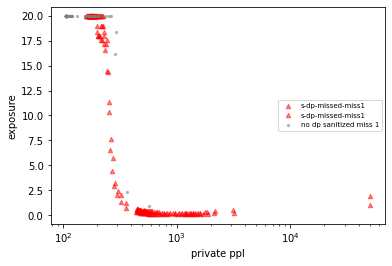

In [35]:
# missed experiments, both unk and digits
#nodp normalized
df_nodps_normalized_miss1 = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "nodp_normalized_miss20", "*.csv")):
    df_nodps_normalized_miss1.append(join_adjusted_ppl(p))

#nodp normalized
df_partialdps_missed_miss1 = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "partialdp_missed_20", "*.csv")):
    try:
        df_partialdps_missed_miss1.append(join_adjusted_ppl(p))
    except:
        print(p)

# missed
dot_size=20
alpha = 0.5
# x_var, y_var = "private_ppl", "canary_exposure"
# x_var, y_var = "epoch", "private_ppl"
x_var, y_var = "overall_ppl", "canary_exposure"




# average
if False:
    # pass
    df_nodps_normalized_miss1 = [average_by_epoch(df_nodps_normalized_miss1, x_var, y_var)]
    df_partialdps_missed_miss1 = [average_by_epoch(df_partialdps_missed_miss1, x_var, y_var)]



NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*3

fig = plt.figure()
ax = fig.add_subplot(111)

plot_func = ax.scatter



for i, df_partialdp in enumerate(df_partialdps_missed_miss1):
    df_partialdp = df_partialdp.iloc[:100]
    label = "s-dp-missed-miss1"
    # label = f"s-dp-missed, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    if True:
        scatters = plot_func(df_partialdp[x_var].tolist(), df_partialdp[y_var].tolist(), color='red', marker=MARKERS[2], s=dot_size, alpha=alpha, label=label)

for i, df_nodp_normalized_miss1 in enumerate(df_nodps_normalized_miss1):
    plot_func(df_nodp_normalized_miss1[x_var].tolist()[1:], df_nodp_normalized_miss1[y_var].tolist()[1:], color='grey', marker=MARKERS[0], s=dot_size, alpha=alpha, label='no dp sanitized miss 1')




# plot_func(df_partial025[x_var].tolist()[1:], df_partial025[y_var].tolist()[1:], color='pink', s=dot_size, alpha=alpha)

# plot_func(151, 0.5, color='red')
# plot_func(120, 0.5, color='red')

plt.legend(loc="right", prop={'size':7})
plt.xscale('log')
plt.xlabel('private ppl')
plt.ylabel('exposure')
plt.show()

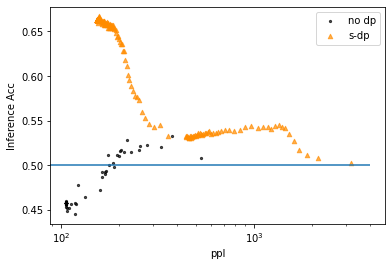

In [121]:
# missed membership inference
#nodp
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "nodp_normalized", "final_fix", "*.csv")):
    df_nodps.append(join_adjusted_ppl(p))
# df_nodps = pd.concat(df_nodps)


#partial dp
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "partialdp", "final_concat", "*.csv")):
    df_partialdps.append(join_adjusted_ppl(p))
# df_partialdps = pd.concat(df_partialdps)


dot_size=20
alpha = 0.7
x_var = 'overall_ppl'
metrics = 'inference_ppl_acc'#'inference_zlip_acc'#'inference_gpt2_acc'#'inference_ppl_acc'#'inference_lower_ppl_acc'#'inference_ppl_acc'

NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*4

fig = plt.figure()
ax = fig.add_subplot(111)

plot_func = ax.scatter
plt.hlines(0.5, xmin=0, xmax=4000)

# average
if AVERAGE:
    df_nodps = [average_by_epoch(df_nodps, x_var, metrics)]
    df_partialdps = [average_by_epoch(df_partialdps, x_var, metrics)]




for i, df_nodp in enumerate(df_nodps):
    plot_func(df_nodp[x_var].tolist()[1:], df_nodp[metrics].tolist()[1:], color=COLORS[0], s=dot_size, alpha=alpha, label='no dp', marker=MARKERS[0])


for i, df_partialdp in enumerate(df_partialdps):
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    label = "s-dp"
    # label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    scatters = plot_func(df_partialdp[x_var].tolist()[1:], df_partialdp[metrics].tolist()[1:], color=COLORS[2], s=dot_size, alpha=alpha, label=label, marker=MARKERS[2])
    # scatters.set_color(cm(i//3*3.0/NUM_COLORS))


plt.legend(loc="upper right", prop={'size':10})
plt.xscale('log')
plt.xlabel('ppl')
plt.ylabel('Inference Acc')
plt.show()

111 111
111 111
110 110
111 111
111 111
101 101
101 101
101 101
101 101
101 101
67 67
67 67
67 67
67 67
67 67


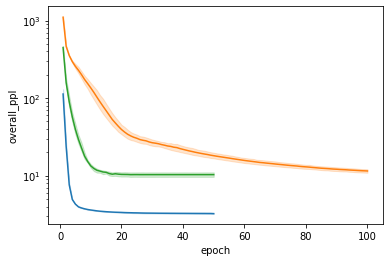

In [9]:
## dialog, ppl vs epoch
#nodp
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "dialog",  "nodp", "bs32", "lr0.5_bs4", "*.csv")):
    df_nodps.append(join_adjusted_ppl(p))
df_nodps = pd.concat(df_nodps)

#full dp
df_dps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "dialog", "dp", "final", "*.csv")):
    df_dps.append(join_adjusted_ppl(p))
df_dps = pd.concat(df_dps)

#partial dp
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "dialog", "partialdp", "final",  "*.csv")):
    df_partialdps.append(join_adjusted_ppl(p))
df_partialdps = pd.concat(df_partialdps)


ax = sns.lineplot(x="epoch", y="overall_ppl", data=df_nodps[df_nodps.epoch!=0])
ax = sns.lineplot(x="epoch", y="overall_ppl", data=df_dps[df_dps.epoch!=0])
ax = sns.lineplot(x="epoch", y="overall_ppl", data=df_partialdps[df_partialdps.epoch!=0])
plt.yscale('log')

111 111
111 111
111 111
111 111
111 111
101 101
101 101
101 101
101 101
101 101
67 67
67 67
67 67
67 67
67 67


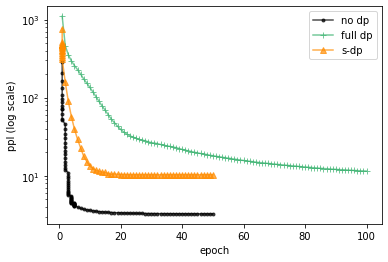

In [12]:
## dialog, ppl vs epoch
#nodp
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "dialog",  "nodp", "bs32", "lr0.5_bs4", "*.csv")):
    df_nodps.append(join_adjusted_ppl(p))
# df_nodps = pd.concat(df_nodps)

#full dp
df_dps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "dialog", "dp", "final", "*.csv")):
    df_dps.append(join_adjusted_ppl(p))
# df_dps = pd.concat(df_dps)

#partial dp
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "dialog", "partialdp", "final",  "*.csv")):
    df_partialdps.append(join_adjusted_ppl(p))
# df_partialdps = pd.concat(df_partialdps)



dot_size=3
alpha = 0.7
x_var = 'epoch'
metrics = 'overall_ppl'#'inference_zlip_acc'#'inference_gpt2_acc'#'inference_ppl_acc'#'inference_lower_ppl_acc'#'inference_ppl_acc'

NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*4

fig = plt.figure()
ax = fig.add_subplot(111)

plot_func = plt.plot

# average
if AVERAGE:
    df_nodps = [average_by_epoch(df_nodps, x_var, metrics)]
    df_dps = [average_by_epoch(df_dps, x_var, metrics)]
    df_partialdps = [average_by_epoch(df_partialdps, x_var, metrics)]



for i, df_nodp in enumerate(df_nodps):
    plot_func(df_nodp[x_var].tolist()[1:], df_nodp[metrics].tolist()[1:], color=COLORS[0], #s=dot_size, 
    alpha=alpha, label='no dp', marker=MARKERS[0])


for i, df_dp in enumerate(df_dps):
    plot_func(df_dp[x_var].tolist()[1:], df_dp[metrics].tolist()[1:], color=COLORS[1], #s=dot_size, 
    alpha=alpha, label='full dp', marker=MARKERS[1])



for i, df_partialdp in enumerate(df_partialdps):
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    label = "s-dp"
    # label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    scatters = plot_func(df_partialdp[x_var].tolist()[1:], df_partialdp[metrics].tolist()[1:], color=COLORS[2], #s=dot_size, 
    alpha=alpha, label=label, marker=MARKERS[2])
    # scatters.set_color(cm(i//3*3.0/NUM_COLORS))



# plt.hlines(0.5, xmin=0, xmax=2000)
plt.legend(loc="upper right", prop={'size':10})
plt.yscale('log')
plt.xlabel('epoch')
plt.ylabel('ppl (log scale)')
plt.show()

101 101
101 101
101 101
101 101
101 101
101 101
101 101
101 101
101 101
101 101
67 67
67 67
67 67
67 67
67 67


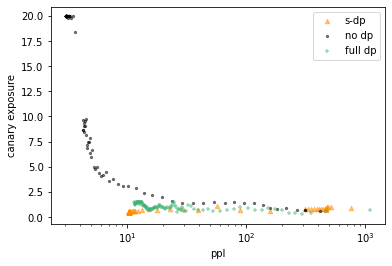

In [63]:
# dialog, canary insertion
#nodp
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "dialog",  "nodp", 
# "bs32", "lr0.5_bs4", 
"lr2_bs4", 
"*.csv"
)):
    df_nodps.append(join_adjusted_ppl(p))
# df_nodps = pd.concat(df_nodps)

#full dp
df_dps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "dialog", "dp", "final", "*.csv")):
    df_dps.append(join_adjusted_ppl(p))
# df_dps = pd.concat(df_dps)

#partial dp
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "dialog", "partialdp", "final",  "*.csv")):
    df_partialdps.append(join_adjusted_ppl(p))
# df_partialdps = pd.concat(df_partialdps)


dot_size=20
alpha = 0.5
x_var = 'overall_ppl'#'overall_ppl'
metrics = 'canary_exposure'#'inference_zlip_acc'#'inference_gpt2_acc'#'inference_ppl_acc'#'inference_lower_ppl_acc'#'inference_ppl_acc'

NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*4

fig = plt.figure()
ax = fig.add_subplot(111)

plot_func = ax.scatter

# average
if True:
    df_nodps = [average_by_epoch(df_nodps, x_var, metrics)]
    df_dps = [average_by_epoch(df_dps, x_var, metrics)]
    df_partialdps = [average_by_epoch(df_partialdps, x_var, metrics)]


for i, df_partialdp in enumerate(df_partialdps):
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    label = "s-dp"
    # label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    scatters = plot_func(df_partialdp[x_var].tolist()[1:], df_partialdp[metrics].tolist()[1:], color=COLORS[2], s=dot_size, alpha=alpha, label=label, marker=MARKERS[2])
    # scatters.set_color(cm(i//3*3.0/NUM_COLORS))


for i, df_nodp in enumerate(df_nodps):
    plot_func(df_nodp[x_var].tolist()[1:], df_nodp[metrics].tolist()[1:], color=COLORS[0], s=dot_size, alpha=alpha, label='no dp', marker=MARKERS[0])


for i, df_dp in enumerate(df_dps):
    plot_func(df_dp[x_var].tolist()[1:], df_dp[metrics].tolist()[1:], color=COLORS[1], s=dot_size, alpha=alpha, label='full dp', marker=MARKERS[1])


# plt.hlines(0.5, xmin=0, xmax=2000)
plt.legend(loc="upper right", prop={'size':10})
plt.xscale('log')
plt.xlabel('ppl')
plt.ylabel('canary exposure')
plt.show()

101 101
101 101
101 101
101 101
101 101
67 67
67 67
67 67
67 67
67 67


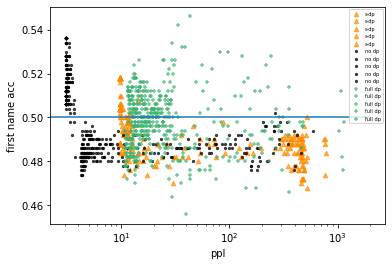

In [8]:
# dialog, membership inference, full name
#nodp
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dialog", "nodp", 
# "final_fix", "lr0.5_bs4",  
"final_fix", "lr2_bs4",  
"*.csv")):
    df_nodps.append(pd.read_csv(p))
# df_nodps = pd.concat(df_nodps)

#full dp
df_dps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dialog", "dp", "final_fix", "*.csv")):
    df_dps.append(join_adjusted_ppl(p))
# df_dps = pd.concat(df_dps)

#partial dp
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dialog", "partialdp", "final_fix", "*.csv")):
    df_partialdps.append(join_adjusted_ppl(p))
# df_partialdps = pd.concat(df_partialdps)


dot_size=20
alpha = 0.7
x_var = 'model_ppl'
metrics = 'inference_ppl_acc'#'inference_zlip_acc'#'inference_gpt2_acc'#'inference_ppl_acc'#'inference_lower_ppl_acc'#'inference_ppl_acc'

NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*4

fig = plt.figure()
ax = fig.add_subplot(111)

plot_func = ax.scatter

plt.hlines(0.5, xmin=0, xmax=2000)

# average
if False:
    df_nodps = [average_by_epoch(df_nodps, x_var, metrics)]
    df_dps = [average_by_epoch(df_dps, x_var, metrics)]
    df_partialdps = [average_by_epoch(df_partialdps, x_var, metrics)]


for i, df_partialdp in enumerate(df_partialdps):
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    label = "s-dp"
    # label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    scatters = plot_func(df_partialdp[x_var].tolist()[1:], df_partialdp[metrics].tolist()[1:], color=COLORS[2], s=dot_size, alpha=alpha, label=label, marker=MARKERS[2])
    # scatters.set_color(cm(i//3*3.0/NUM_COLORS))


for i, df_nodp in enumerate(df_nodps):
    plot_func(df_nodp[x_var].tolist()[1:], df_nodp[metrics].tolist()[1:], color=COLORS[0], s=dot_size, alpha=alpha, label='no dp', marker=MARKERS[0])


for i, df_dp in enumerate(df_dps):
    plot_func(df_dp[x_var].tolist()[1:], df_dp[metrics].tolist()[1:], color=COLORS[1], s=dot_size, alpha=alpha, label='full dp', marker=MARKERS[1])


plt.legend(loc="upper right", prop={'size':5})
plt.xscale('log')
plt.xlabel('ppl')
plt.ylabel('first name acc')
plt.show()

101 101
101 101
101 101
101 101
101 101
67 67
67 67
67 67
67 67
67 67


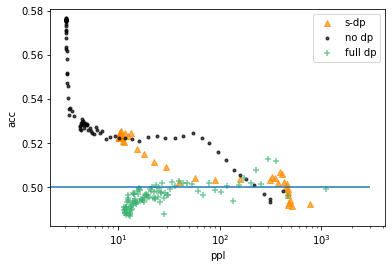

In [11]:
# dialog, membership inference, first name
#nodp
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dialog", "nodp", 
# "final_fix_firstname", "lr0.5_bs4", 
"final_fix_firstname", "lr2_bs4", 
"*.csv")):
    df_nodps.append(pd.read_csv(p))
# df_nodps = pd.concat(df_nodps)

#full dp
df_dps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dialog", "dp", "final_fix_firstname", "*.csv")):
    df_dps.append(join_adjusted_ppl(p))
# df_dps = pd.concat(df_dps)

#partial dp
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dialog", "partialdp", "final_fix_firstname", "*.csv")):
    df_partialdps.append(join_adjusted_ppl(p))
# df_partialdps = pd.concat(df_partialdps)


dot_size=20
alpha = 0.7
x_var = 'model_ppl'
metrics = 'inference_ppl_acc'#'inference_zlip_acc'#'inference_gpt2_acc'#'inference_ppl_acc'#'inference_lower_ppl_acc'#'inference_ppl_acc'

NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*4

fig = plt.figure()
ax = fig.add_subplot(111)

plot_func = ax.scatter
plt.hlines(0.5, xmin=0, xmax=3000)

# average
if True:
    df_nodps = [average_by_epoch(df_nodps, x_var, metrics)]
    df_dps = [average_by_epoch(df_dps, x_var, metrics)]
    df_partialdps = [average_by_epoch(df_partialdps, x_var, metrics)]


for i, df_partialdp in enumerate(df_partialdps):
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    label = "s-dp"
    # label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    scatters = plot_func(df_partialdp[x_var].tolist()[1:], df_partialdp[metrics].tolist()[1:], color=COLORS[2], 
    # s=dot_size, 
    alpha=alpha, label=label, marker=MARKERS[2])
    # plt.fill_between(df_partialdp[x_var], df_partialdp[metrics]-df_partialdp['y_std'], df_partialdp[metrics]+df_partialdp['y_std'])
    # scatters.set_color(cm(i//3*3.0/NUM_COLORS))


for i, df_nodp in enumerate(df_nodps):
    plot_func(df_nodp[x_var].tolist()[1:], df_nodp[metrics].tolist()[1:], color=COLORS[0], 
    # s=dot_size, 
    alpha=alpha, label='no dp', marker=MARKERS[0])


for i, df_dp in enumerate(df_dps):
    plot_func(df_dp[x_var].tolist()[1:], df_dp[metrics].tolist()[1:], color=COLORS[1], 
    # s=dot_size, 
    alpha=alpha, label='full dp', marker=MARKERS[1])


plt.legend(loc="upper right", prop={'size': 10})
plt.xscale('log')
plt.xlabel('ppl')
plt.ylabel('acc')
plt.show()

In [16]:
df_partialdp

,overall_ppl,canary_exposure
0,50038.102839,2.088593
1,3168.429054,1.036141
2,2157.113520,0.834657
3,1877.160782,0.801682
4,1710.755928,0.778037
...,...,...
145,154.550634,0.822103
146,154.550634,0.822103
147,154.550634,0.822103
148,154.550634,0.822103


In [128]:
# canary, normalized no miss
#nodp
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "nodp_normalized_nomiss", "*.csv")):
    df_nodps.append(join_adjusted_ppl(p))
# df_nodps = pd.concat(df_nodps)

#full dp
df_dps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "dp", "*.csv")):
    df_dps.append(join_adjusted_ppl(p))
# df_dps = pd.concat(df_dps)

#partial dp
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "partialdp", "final_concat", "*.csv")):
    df_partialdps.append(join_adjusted_ppl(p))
# df_partialdps = pd.concat(df_partialdps)


dot_size=25
alpha = 0.5
x_var1 = 'overall_ppl'
x_var2 = 'private_ppl'
x_var3 = 'nonprivate_ppl'
x_var4 = 'canary_ppl'
metrics = 'canary_exposure'#'inference_zlip_acc'#'inference_gpt2_acc'#'inference_ppl_acc'#'inference_lower_ppl_acc'#'inference_ppl_acc'

NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*4


fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(25,5))


plot_func1 = ax1.scatter
plot_func2 = ax2.scatter
plot_func3 = ax3.scatter
plot_func4 = ax4.scatter

# average
if False:
    df_nodps1 = [average_by_epoch(df_nodps, x_var1, metrics)]
    df_dps1 = [average_by_epoch(df_dps, x_var1, metrics)]
    df_partialdps1 = [average_by_epoch(df_partialdps, x_var1, metrics)]

    df_nodps2 = [average_by_epoch(df_nodps, x_var2, metrics)]
    df_dps2 = [average_by_epoch(df_dps, x_var2, metrics)]
    df_partialdps2 = [average_by_epoch(df_partialdps, x_var2, metrics)]

    df_nodps3 = [average_by_epoch(df_nodps, x_var3, metrics)]
    df_dps3 = [average_by_epoch(df_dps, x_var3, metrics)]
    df_partialdps3 = [average_by_epoch(df_partialdps, x_var3, metrics)]

    df_nodps4 = [average_by_epoch(df_nodps, x_var4, metrics)]
    df_dps4 = [average_by_epoch(df_dps, x_var4, metrics)]
    df_partialdps4 = [average_by_epoch(df_partialdps, x_var4, metrics)]


for i, df_partialdp in enumerate(df_partialdps1):
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    label = "s-dp"
    # label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    scatters = plot_func1(df_partialdp[x_var1].tolist()[1:], df_partialdp[metrics].tolist()[1:], color=COLORS[2], s=dot_size, alpha=alpha, label=label, marker=MARKERS[2])
    # scatters.set_color(cm(i//3*3.0/NUM_COLORS))


for i, df_dp in enumerate(df_dps1):
    plot_func1(df_dp[x_var1].tolist()[1:], df_dp[metrics].tolist()[1:], color=COLORS[1], s=dot_size, alpha=alpha, label="full dp", marker=MARKERS[1])


for i, df_nodp in enumerate(df_nodps1):
    plot_func1(df_nodp[x_var1].tolist()[1:], df_nodp[metrics].tolist()[1:], color=COLORS[3], s=dot_size, alpha=alpha, label='no dp, normalized', marker=MARKERS[0])



###############################################
for i, df_partialdp in enumerate(df_partialdps2):
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    label = "s-dp"
    # label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    scatters = plot_func2(df_partialdp[x_var2].tolist()[1:], df_partialdp[metrics].tolist()[1:], color=COLORS[2], s=dot_size, alpha=alpha, label=label, marker=MARKERS[2])
    # scatters.set_color(cm(i//3*3.0/NUM_COLORS))


for i, df_dp in enumerate(df_dps2):
    plot_func2(df_dp[x_var2].tolist()[1:], df_dp[metrics].tolist()[1:], color=COLORS[1], s=dot_size, alpha=alpha, label='full dp', marker=MARKERS[1])


for i, df_nodp in enumerate(df_nodps2):
    plot_func2(df_nodp[x_var2].tolist()[1:], df_nodp[metrics].tolist()[1:], color=COLORS[3], s=dot_size, alpha=alpha, label='no dp, normalized', marker=MARKERS[0])



###############################################
for i, df_partialdp in enumerate(df_partialdps3):
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    label = "s-dp"
    # label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    scatters = plot_func3(df_partialdp[x_var3].tolist()[1:], df_partialdp[metrics].tolist()[1:], color=COLORS[2], s=dot_size, alpha=alpha, label=label, marker=MARKERS[2])
    # scatters.set_color(cm(i//3*3.0/NUM_COLORS))


for i, df_dp in enumerate(df_dps3):
    plot_func3(df_dp[x_var3].tolist()[1:], df_dp[metrics].tolist()[1:], color=COLORS[1], s=dot_size, alpha=alpha, label='full dp', marker=MARKERS[1])


for i, df_nodp in enumerate(df_nodps3):
    plot_func3(df_nodp[x_var3].tolist()[1:], df_nodp[metrics].tolist()[1:], color=COLORS[3], s=dot_size, alpha=alpha, label='no dp, normalized', marker=MARKERS[0])

###############################################
for i, df_partialdp in enumerate(df_partialdps4):
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    label = "s-dp"
    # label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    scatters = plot_func4(df_partialdp[x_var4].tolist()[1:], df_partialdp[metrics].tolist()[1:], color=COLORS[2], s=dot_size, alpha=alpha, label=label, marker=MARKERS[2])
    # scatters.set_color(cm(i//3*3.0/NUM_COLORS))


for i, df_dp in enumerate(df_dps4):
    plot_func4(df_dp[x_var4].tolist()[1:], df_dp[metrics].tolist()[1:], color=COLORS[1], s=dot_size, alpha=alpha, label='full dp', marker=MARKERS[1])


for i, df_nodp in enumerate(df_nodps4):
    plot_func4(df_nodp[x_var4].tolist()[1:], df_nodp[metrics].tolist()[1:], color=COLORS[3], s=dot_size, alpha=alpha, label='no dp, normalized', marker=MARKERS[0])





# plt.hlines(0.5, xmin=0, xmax=2000)
loc = 'upper center'
font_size=12
label_font_size = 15
ax1.legend(loc=loc, prop={'size':font_size})
ax1.set_xscale('log')
ax1.set_xlabel('overall ppl', fontsize=label_font_size)
ax1.set_ylabel('canary exposure', fontsize=label_font_size)
ax1.tick_params(axis='both', which='minor', labelsize=12)


ax2.legend(loc=loc, prop={'size':font_size})
ax2.set_xscale('log')
ax2.set_xlabel('private ppl', fontsize=label_font_size)
ax2.set_ylabel('canary exposure', fontsize=label_font_size)
ax2.tick_params(axis='both', which='minor', labelsize=12)


ax3.legend(loc=loc, prop={'size':font_size})
ax3.set_xscale('log')
ax3.set_xlabel('nonprivate ppl', fontsize=label_font_size)
ax3.set_ylabel('canary exposure', fontsize=label_font_size)
ax3.tick_params(axis='both', which='minor', labelsize=12)

ax4.legend(loc=loc, prop={'size':font_size})
ax4.set_xscale('log')
ax4.set_xlabel('canary ppl', fontsize=label_font_size)
ax4.set_ylabel('canary exposure', fontsize=label_font_size)
ax4.tick_params(axis='both', which='minor', labelsize=12)


plt.show()

73 73
73 73
73 73
73 73
73 73
101 101
101 101
101 101
101 101
101 101
150 150
150 150
150 150
150 150
150 150


KeyError: 'canary_exposure'

73 73
73 73
73 73
73 73
73 73
101 101
150 150
150 150
150 150
150 150
150 150


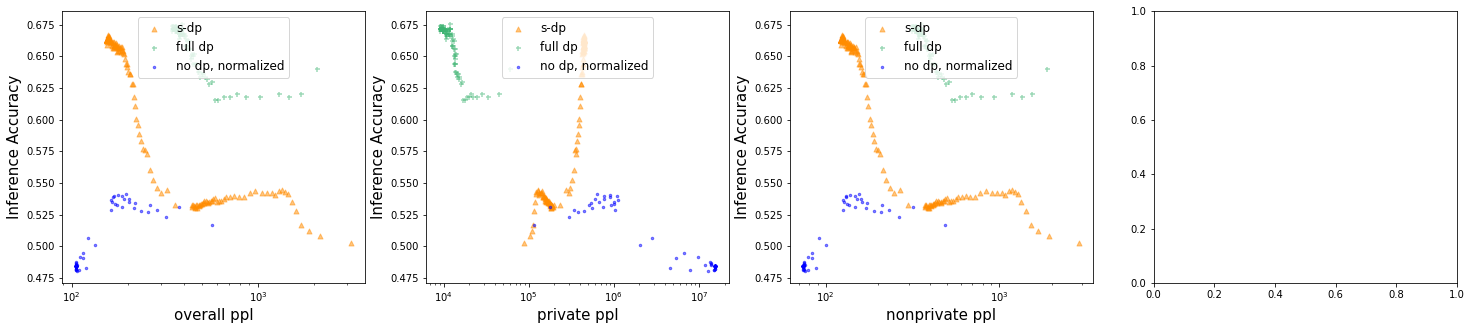

In [75]:
# membership, normalized no miss
# df_nodps_can = []
# for p in glob(os.path.join(BASE_DIR, "canary_insertion", "nodp_normalized_nomiss", "*.csv")):
#     df_nodps_can.append(join_adjusted_ppl(p))
# # df_nodps = pd.concat(df_nodps)

# #full dp
# df_dps_can = []
# for p in glob(os.path.join(BASE_DIR, "canary_insertion", "dp", "*.csv")):
#     df_dps_can.append(join_adjusted_ppl(p))
# # df_dps = pd.concat(df_dps)

# #partial dp
# df_partialdps_can = []
# for p in glob(os.path.join(BASE_DIR, "canary_insertion", "partialdp", "final_concat", "*.csv")):
#     df_partialdps_can.append(join_adjusted_ppl(p))
# # df_partialdps = pd.concat(df_partialdps)


#nodp
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "nodp_normalized_nomiss", "*.csv")):
    df_nodps.append(join_adjusted_ppl(p))
# df_nodps = pd.concat(df_nodps)

#full dp
df_dps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dp", "*.csv")):
    df_dps.append(join_adjusted_ppl(p))
# df_dps = pd.concat(df_dps)

#partial dp
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "partialdp", "final_concat", "*.csv")):
    df_partialdps.append(join_adjusted_ppl(p))
# df_partialdps = pd.concat(df_partialdps)


dot_size=25
alpha = 0.5
x_var1 = 'overall_ppl'
x_var2 = 'private_ppl'
x_var3 = 'nonprivate_ppl'
x_var4 = 'canary_ppl'
metrics = 'inference_ppl_acc'#'inference_zlip_acc'#'inference_gpt2_acc'#'inference_ppl_acc'#'inference_lower_ppl_acc'#'inference_ppl_acc'

NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*4


fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(25,5))


plot_func1 = ax1.scatter
plot_func2 = ax2.scatter
plot_func3 = ax3.scatter
plot_func4 = ax4.scatter

# average
if True:
    df_nodps1 = [average_by_epoch(df_nodps, x_var1, metrics)]
    df_dps1 = [average_by_epoch(df_dps, x_var1, metrics)]
    df_partialdps1 = [average_by_epoch(df_partialdps, x_var1, metrics)]

    df_nodps2 = [average_by_epoch(df_nodps, x_var2, metrics)]
    df_dps2 = [average_by_epoch(df_dps, x_var2, metrics)]
    df_partialdps2 = [average_by_epoch(df_partialdps, x_var2, metrics)]

    df_nodps3 = [average_by_epoch(df_nodps, x_var3, metrics)]
    df_dps3 = [average_by_epoch(df_dps, x_var3, metrics)]
    df_partialdps3 = [average_by_epoch(df_partialdps, x_var3, metrics)]

    # df_nodps4 = [average_by_epoch(df_nodps, x_var4, metrics)]
    # df_dps4 = [average_by_epoch(df_dps, x_var4, metrics)]
    # df_partialdps4 = [average_by_epoch(df_partialdps, x_var4, metrics)]


for i, df_partialdp in enumerate(df_partialdps1):
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    label = "s-dp"
    # label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    scatters = plot_func1(df_partialdp[x_var1].tolist()[1:], df_partialdp[metrics].tolist()[1:], color=COLORS[2], s=dot_size, alpha=alpha, label=label, marker=MARKERS[2])
    # scatters.set_color(cm(i//3*3.0/NUM_COLORS))


for i, df_dp in enumerate(df_dps1):
    plot_func1(df_dp[x_var1].tolist()[1:], df_dp[metrics].tolist()[1:], color=COLORS[1], s=dot_size, alpha=alpha, label="full dp", marker=MARKERS[1])


for i, df_nodp in enumerate(df_nodps1):
    plot_func1(df_nodp[x_var1].tolist()[1:], df_nodp[metrics].tolist()[1:], color=COLORS[3], s=dot_size, alpha=alpha, label='no dp, normalized', marker=MARKERS[0])



###############################################
for i, df_partialdp in enumerate(df_partialdps2):
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    label = "s-dp"
    # label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    scatters = plot_func2(df_partialdp[x_var2].tolist()[1:], df_partialdp[metrics].tolist()[1:], color=COLORS[2], s=dot_size, alpha=alpha, label=label, marker=MARKERS[2])
    # scatters.set_color(cm(i//3*3.0/NUM_COLORS))


for i, df_dp in enumerate(df_dps2):
    plot_func2(df_dp[x_var2].tolist()[1:], df_dp[metrics].tolist()[1:], color=COLORS[1], s=dot_size, alpha=alpha, label='full dp', marker=MARKERS[1])


for i, df_nodp in enumerate(df_nodps2):
    plot_func2(df_nodp[x_var2].tolist()[1:], df_nodp[metrics].tolist()[1:], color=COLORS[3], s=dot_size, alpha=alpha, label='no dp, normalized', marker=MARKERS[0])



###############################################
for i, df_partialdp in enumerate(df_partialdps3):
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    label = "s-dp"
    # label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    scatters = plot_func3(df_partialdp[x_var3].tolist()[1:], df_partialdp[metrics].tolist()[1:], color=COLORS[2], s=dot_size, alpha=alpha, label=label, marker=MARKERS[2])
    # scatters.set_color(cm(i//3*3.0/NUM_COLORS))


for i, df_dp in enumerate(df_dps3):
    plot_func3(df_dp[x_var3].tolist()[1:], df_dp[metrics].tolist()[1:], color=COLORS[1], s=dot_size, alpha=alpha, label='full dp', marker=MARKERS[1])


for i, df_nodp in enumerate(df_nodps3):
    plot_func3(df_nodp[x_var3].tolist()[1:], df_nodp[metrics].tolist()[1:], color=COLORS[3], s=dot_size, alpha=alpha, label='no dp, normalized', marker=MARKERS[0])

###############################################
# for i, df_partialdp in enumerate(df_partialdps4):
#     # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
#     label = "s-dp"
#     # label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
#     # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
#     scatters = plot_func4(df_partialdp[x_var4].tolist()[1:], df_partialdp[metrics].tolist()[1:], color=COLORS[2], s=dot_size, alpha=alpha, label=label, marker=MARKERS[2])
#     # scatters.set_color(cm(i//3*3.0/NUM_COLORS))


# for i, df_dp in enumerate(df_dps4):
#     plot_func4(df_dp[x_var4].tolist()[1:], df_dp[metrics].tolist()[1:], color=COLORS[1], s=dot_size, alpha=alpha, label='full dp', marker=MARKERS[1])


# for i, df_nodp in enumerate(df_nodps4):
#     plot_func4(df_nodp[x_var4].tolist()[1:], df_nodp[metrics].tolist()[1:], color=COLORS[3], s=dot_size, alpha=alpha, label='no dp, normalized', marker=MARKERS[0])





# plt.hlines(0.5, xmin=0, xmax=2000)
loc = 'upper center'
font_size=12
label_font_size = 15
ax1.legend(loc=loc, prop={'size':font_size})
ax1.set_xscale('log')
ax1.set_xlabel('overall ppl', fontsize=label_font_size)
ax1.set_ylabel('Inference Accuracy', fontsize=label_font_size)
ax1.tick_params(axis='both', which='minor', labelsize=12)


ax2.legend(loc=loc, prop={'size':font_size})
ax2.set_xscale('log')
ax2.set_xlabel('private ppl', fontsize=label_font_size)
ax2.set_ylabel('Inference Accuracy', fontsize=label_font_size)
ax2.tick_params(axis='both', which='minor', labelsize=12)


ax3.legend(loc=loc, prop={'size':font_size})
ax3.set_xscale('log')
ax3.set_xlabel('nonprivate ppl', fontsize=label_font_size)
ax3.set_ylabel('Inference Accuracy', fontsize=label_font_size)
ax3.tick_params(axis='both', which='minor', labelsize=12)

# ax4.legend(loc=loc, prop={'size':font_size})
# ax4.set_xscale('log')
# ax4.set_xlabel('canary ppl', fontsize=label_font_size)
# ax4.set_ylabel('Inference Accuracy', fontsize=label_font_size)
# ax4.tick_params(axis='both', which='minor', labelsize=12)


plt.show()

In [134]:
def average_by_epoch1(df_list, x, y, nbins=100):
    df = pd.concat(df_list)
    df = df[df.epoch != 0]

    bin_size = (df[x].max() - df[x].min())/nbins

    bins = []
    for i in range(-1, nbins+1):
        bins.append(df[x].min() + i*bin_size)

    df['binned'] = pd.cut(df[x], bins)

    x_new_values, y_new_values, y_std = df.groupby('binned')[x].mean(), df.groupby('binned')[y].mean(), df.groupby('binned')[y].std()

    x_new_values = [n for n in x_new_values if not pd.isnull(n)]
    y_new_values = [n for n in y_new_values if not pd.isnull(n)]
    y_std = [n for n in y_std if not pd.isnull(n)]

    df = pd.DataFrame(zip(x_new_values, y_new_values, y_std), columns=[x, y, 'y_std'])

    return df

111 111
111 111
111 111
111 111
111 111
101 101
101 101
101 101
101 101
101 101
67 67
67 67
67 67
67 67
67 67


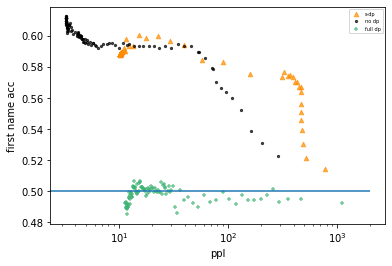

In [39]:
# dialog, membership inference, full name
#nodp
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dialog", "nodp", "final_fix_firstname_fromUSCensus", "lr0.5_bs4",  "*.csv")):
    df_nodps.append(join_adjusted_ppl(p))
# df_nodps = pd.concat(df_nodps)

#full dp
df_dps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dialog", "dp", "final_fix", "*.csv")):
    df_dps.append(join_adjusted_ppl(p))
# df_dps = pd.concat(df_dps)

#partial dp
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dialog", "partialdp", "final_fix_firstname_fromUSCensus", "*.csv")):
    df_partialdps.append(join_adjusted_ppl(p))
# df_partialdps = pd.concat(df_partialdps)


dot_size=20
alpha = 0.7
x_var = 'overall_ppl'
metrics = 'inference_ppl_acc'#'inference_zlip_acc'#'inference_gpt2_acc'#'inference_ppl_acc'#'inference_lower_ppl_acc'#'inference_ppl_acc'

NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*4

fig = plt.figure()
ax = fig.add_subplot(111)

plot_func = ax.scatter

plt.hlines(0.5, xmin=0, xmax=2000)

# average
if True:
    df_nodps = [average_by_epoch(df_nodps, x_var, metrics)]
    df_dps = [average_by_epoch(df_dps, x_var, metrics)]
    df_partialdps = [average_by_epoch(df_partialdps, x_var, metrics)]


for i, df_partialdp in enumerate(df_partialdps):
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    label = "s-dp"
    # label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    scatters = plot_func(df_partialdp[x_var].tolist()[1:], df_partialdp[metrics].tolist()[1:], color=COLORS[2], s=dot_size, alpha=alpha, label=label, marker=MARKERS[2])
    # scatters.set_color(cm(i//3*3.0/NUM_COLORS))


for i, df_nodp in enumerate(df_nodps):
    plot_func(df_nodp[x_var].tolist()[1:], df_nodp[metrics].tolist()[1:], color=COLORS[0], s=dot_size, alpha=alpha, label='no dp', marker=MARKERS[0])


for i, df_dp in enumerate(df_dps):
    plot_func(df_dp[x_var].tolist()[1:], df_dp[metrics].tolist()[1:], color=COLORS[1], s=dot_size, alpha=alpha, label='full dp', marker=MARKERS[1])


plt.legend(loc="upper right", prop={'size':5})
plt.xscale('log')
plt.xlabel('ppl')
plt.ylabel('first name acc')
plt.show()

101 101
101 101
101 101
101 101
101 101
101 101
101 101
101 101
101 101
101 101
67 67
67 67
67 67
67 67
67 67


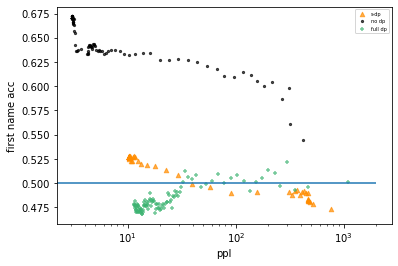

In [65]:
# dialog, membership inference, first name, twice attack, without ground truth help
#nodp
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dialog", "nodp", 
# "final_fix_firstname_picked_without_ground_truth_help", 
"final_fix_firstname_picked_nodp_lr2_bs4_without_ground_truth_help", 
"*.csv")):
    df_nodps.append(join_adjusted_ppl(p))
# df_nodps = pd.concat(df_nodps)

#full dp
df_dps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dialog", "dp", 
"final_fix_firstname_picked_without_ground_truth_help", 

"*.csv")):
    df_dps.append(join_adjusted_ppl(p))
# df_dps = pd.concat(df_dps)

#partial dp
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dialog", "partialdp", 

"final_fix_firstname_picked_without_ground_truth_help", 

"*.csv")):
    df_partialdps.append(join_adjusted_ppl(p))
# df_partialdps = pd.concat(df_partialdps)


dot_size=20
alpha = 0.7
x_var = 'overall_ppl'
metrics = 'inference_ppl_acc'#'inference_zlip_acc'#'inference_gpt2_acc'#'inference_ppl_acc'#'inference_lower_ppl_acc'#'inference_ppl_acc'

NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*4

fig = plt.figure()
ax = fig.add_subplot(111)

plot_func = ax.scatter

plt.hlines(0.5, xmin=0, xmax=2000)

# average
if True:
    df_nodps = [average_by_epoch(df_nodps, x_var, metrics)]
    df_dps = [average_by_epoch(df_dps, x_var, metrics)]
    df_partialdps = [average_by_epoch(df_partialdps, x_var, metrics)]


for i, df_partialdp in enumerate(df_partialdps):
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    label = "s-dp"
    # label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    scatters = plot_func(df_partialdp[x_var].tolist()[1:], df_partialdp[metrics].tolist()[1:], color=COLORS[2], s=dot_size, alpha=alpha, label=label, marker=MARKERS[2])
    # scatters.set_color(cm(i//3*3.0/NUM_COLORS))


for i, df_nodp in enumerate(df_nodps):
    plot_func(df_nodp[x_var].tolist()[1:], df_nodp[metrics].tolist()[1:], color=COLORS[0], s=dot_size, alpha=alpha, label='no dp', marker=MARKERS[0])


for i, df_dp in enumerate(df_dps):
    plot_func(df_dp[x_var].tolist()[1:], df_dp[metrics].tolist()[1:], color=COLORS[1], s=dot_size, alpha=alpha, label='full dp', marker=MARKERS[1])


plt.legend(loc="upper right", prop={'size':5})
plt.xscale('log')
plt.xlabel('ppl')
plt.ylabel('first name acc')
plt.show()

101 101
101 101
101 101
101 101
101 101
67 67
67 67
67 67
67 67
67 67


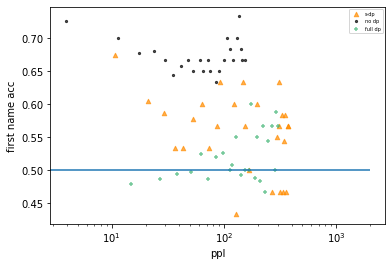

In [138]:
# dialog, membership inference, first name, twice attack, without ground truth help
#nodp
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dialog", "nodp", 
"final_fix_firstname_picked_nodp_lr2_bs4_without_ground_truth_help_intersection", 
# "final_fix", 
# "lr2_bs4",
"*.csv")):
    df_nodps.append(pd.read_csv(p))
# df_nodps = pd.concat(df_nodps)

#full dp
df_dps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dialog", "dp", 
# "final_fix", 
"final_fix_firstname_picked_without_ground_truth_help_intersection",
"*.csv")):
    df_dps.append(join_adjusted_ppl(p))
# df_dps = pd.concat(df_dps)

#partial dp
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dialog", "partialdp", 
# "final_fix", 
"final_fix_firstname_picked_without_ground_truth_help_intersection",
"*.csv")):
    df_partialdps.append(join_adjusted_ppl(p))
# df_partialdps = pd.concat(df_partialdps)


dot_size=20
alpha = 0.7
x_var = 'model_ppl'
metrics = 'inference_ppl_acc'#'inference_zlip_acc'#'inference_gpt2_acc'#'inference_ppl_acc'#'inference_lower_ppl_acc'#'inference_ppl_acc'

NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*4

fig = plt.figure()
ax = fig.add_subplot(111)

plot_func = ax.scatter

plt.hlines(0.5, xmin=0, xmax=2000)

# average
if True:
    df_nodps = [average_by_epoch1(df_nodps, x_var, metrics)]
    df_dps = [average_by_epoch1(df_dps, x_var, metrics)]
    df_partialdps = [average_by_epoch1(df_partialdps, x_var, metrics)]


for i, df_partialdp in enumerate(df_partialdps):
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    label = "s-dp"
    # label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    scatters = plot_func(df_partialdp[x_var].tolist()[1:], df_partialdp[metrics].tolist()[1:], color=COLORS[2], s=dot_size, alpha=alpha, label=label, marker=MARKERS[2])
    # scatters.set_color(cm(i//3*3.0/NUM_COLORS))


for i, df_nodp in enumerate(df_nodps):
    plot_func(df_nodp[x_var].tolist()[1:], df_nodp[metrics].tolist()[1:], color=COLORS[0], s=dot_size, alpha=alpha, label='no dp', marker=MARKERS[0])


for i, df_dp in enumerate(df_dps):
    plot_func(df_dp[x_var].tolist()[1:], df_dp[metrics].tolist()[1:], color=COLORS[1], s=dot_size, alpha=alpha, label='full dp', marker=MARKERS[1])


plt.legend(loc="upper right", prop={'size':5})
plt.xscale('log')
plt.xlabel('ppl')
plt.ylabel('first name acc')
plt.show()

101 101
101 101
101 101
101 101
101 101
101 101
101 101
101 101
101 101
101 101
67 67
67 67
67 67
67 67
67 67


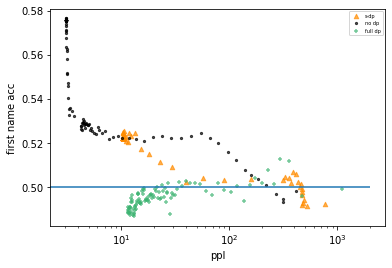

In [70]:
# dialog, membership inference, first name, twice attack, without ground truth help
#nodp
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dialog", "nodp", 
# "final_fix_firstname_picked_without_ground_truth_help", 
"final_fix_firstname", 
"lr2_bs4",
"*.csv")):
    df_nodps.append(join_adjusted_ppl(p))
# df_nodps = pd.concat(df_nodps)

#full dp
df_dps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dialog", "dp", 
"final_fix_firstname", 

"*.csv")):
    df_dps.append(join_adjusted_ppl(p))
# df_dps = pd.concat(df_dps)

#partial dp
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dialog", "partialdp", 

"final_fix_firstname", 

"*.csv")):
    df_partialdps.append(join_adjusted_ppl(p))
# df_partialdps = pd.concat(df_partialdps)


dot_size=20
alpha = 0.7
x_var = 'overall_ppl'
metrics = 'inference_ppl_acc'#'inference_zlip_acc'#'inference_gpt2_acc'#'inference_ppl_acc'#'inference_lower_ppl_acc'#'inference_ppl_acc'

NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*4

fig = plt.figure()
ax = fig.add_subplot(111)

plot_func = ax.scatter

plt.hlines(0.5, xmin=0, xmax=2000)

# average
if True:
    df_nodps = [average_by_epoch(df_nodps, x_var, metrics)]
    df_dps = [average_by_epoch(df_dps, x_var, metrics)]
    df_partialdps = [average_by_epoch(df_partialdps, x_var, metrics)]


for i, df_partialdp in enumerate(df_partialdps):
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    label = "s-dp"
    # label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    scatters = plot_func(df_partialdp[x_var].tolist()[1:], df_partialdp[metrics].tolist()[1:], color=COLORS[2], s=dot_size, alpha=alpha, label=label, marker=MARKERS[2])
    # scatters.set_color(cm(i//3*3.0/NUM_COLORS))


for i, df_nodp in enumerate(df_nodps):
    plot_func(df_nodp[x_var].tolist()[1:], df_nodp[metrics].tolist()[1:], color=COLORS[0], s=dot_size, alpha=alpha, label='no dp', marker=MARKERS[0])


for i, df_dp in enumerate(df_dps):
    plot_func(df_dp[x_var].tolist()[1:], df_dp[metrics].tolist()[1:], color=COLORS[1], s=dot_size, alpha=alpha, label='full dp', marker=MARKERS[1])


plt.legend(loc="upper right", prop={'size':5})
plt.xscale('log')
plt.xlabel('ppl')
plt.ylabel('first name acc')
plt.show()

101 101
101 101
101 101
101 101
101 101
101 101
101 101
101 101
101 101
101 101
67 67
67 67
67 67
67 67
67 67
101 101
101 101
101 101
101 101
101 101
101 101
101 101
101 101
101 101
101 101
67 67
67 67
67 67
67 67
67 67


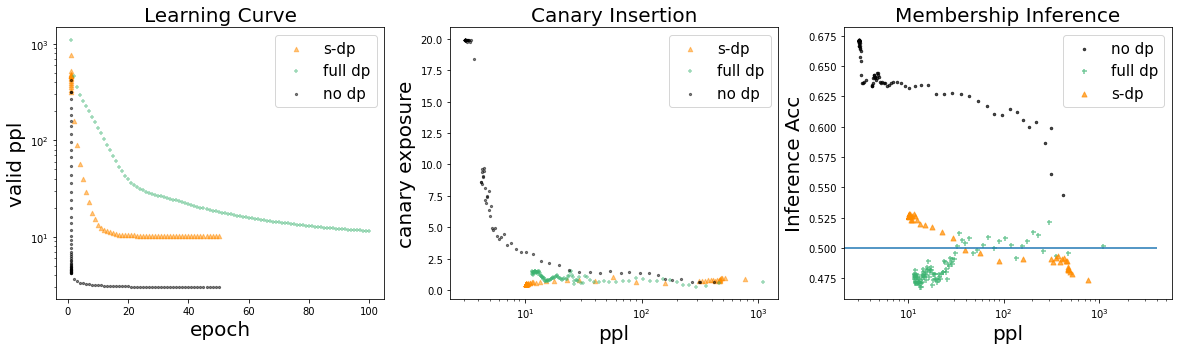

In [72]:
#nodp
title_fontsize = 20
label_font_size = 20
legend_fontsize = 15

#############################
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "dialog",  "nodp", 
# "bs32", "lr0.5_bs4", 
"lr2_bs4", 
"*.csv"
)):
    df_nodps.append(join_adjusted_ppl(p))
# df_nodps = pd.concat(df_nodps)

#full dp
df_dps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "dialog", "dp", "final", "*.csv")):
    df_dps.append(join_adjusted_ppl(p))
# df_dps = pd.concat(df_dps)

#partial dp
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "dialog", "partialdp", "final",  "*.csv")):
    df_partialdps.append(join_adjusted_ppl(p))
# df_partialdps = pd.concat(df_partialdps)

#############################



dot_size=20
alpha = 0.5
x_var = 'overall_ppl'
metrics = 'canary_exposure'#'inference_zlip_acc'#'inference_gpt2_acc'#'inference_ppl_acc'#'inference_lower_ppl_acc'#'inference_ppl_acc'

NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*4

fig, (ax3, ax1, ax2) = plt.subplots(1, 3, figsize=(20,5))


plot_func1 = ax1.scatter
plot_func2 = ax2.scatter
plot_func3 = ax3.scatter

# average
if AVERAGE:
    x_var1 = 'overall_ppl'
    metrics1 = 'canary_exposure'
    
    x_var3 = 'epoch'
    metrics3 = 'overall_ppl'
    
    df_nodps1 = [average_by_epoch(df_nodps, x_var1, metrics1)]
    df_dps1 = [average_by_epoch(df_dps, x_var1, metrics1)]
    df_partialdps1 = [average_by_epoch(df_partialdps, x_var1, metrics1)]

    df_nodps3 = [average_by_epoch(df_nodps, x_var3, metrics3)]
    df_dps3 = [average_by_epoch(df_dps, x_var3, metrics3)]
    df_partialdps3 = [average_by_epoch(df_partialdps, x_var3, metrics3)]



for i, df_partialdp in enumerate(df_partialdps3):
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    label = "s-dp"
    # label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    scatters = plot_func3(df_partialdp[x_var3].tolist()[1:], df_partialdp[metrics3].tolist()[1:], color=COLORS[2], s=dot_size, alpha=alpha, label=label, marker=MARKERS[2])
    # scatters.set_color(cm(i//3*3.0/NUM_COLORS))


for i, df_dp in enumerate(df_dps3):
    plot_func3(df_dp[x_var3].tolist()[1:], df_dp[metrics3].tolist()[1:], color=COLORS[1], s=dot_size, alpha=alpha, label='full dp', marker=MARKERS[1])


for i, df_nodp in enumerate(df_nodps3):
    plot_func3(df_nodp[x_var3].tolist()[1:], df_nodp[metrics3].tolist()[1:], color=COLORS[0], s=dot_size, alpha=alpha, label='no dp', marker=MARKERS[0])


# plt.hlines(0.5, xmin=0, xmax=2000)
ax3.set_title('Learning Curve', fontsize=title_fontsize)

ax3.legend(loc="upper right", prop={'size':legend_fontsize})
ax3.set_yscale('log')
ax3.set_xlabel('epoch', fontsize=label_font_size)
ax3.set_ylabel('valid ppl', fontsize=label_font_size)

#####################################################################################
for i, df_partialdp in enumerate(df_partialdps1):
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    label = "s-dp"
    # label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    scatters = plot_func1(df_partialdp[x_var1].tolist()[1:], df_partialdp[metrics1].tolist()[1:], color=COLORS[2], s=dot_size, alpha=alpha, label=label, marker=MARKERS[2])
    # scatters.set_color(cm(i//3*3.0/NUM_COLORS))


for i, df_dp in enumerate(df_dps1):
    plot_func1(df_dp[x_var1].tolist()[1:], df_dp[metrics1].tolist()[1:], color=COLORS[1], s=dot_size, alpha=alpha, label='full dp', marker=MARKERS[1])


for i, df_nodp in enumerate(df_nodps1):
    plot_func1(df_nodp[x_var1].tolist()[1:], df_nodp[metrics1].tolist()[1:], color=COLORS[0], s=dot_size, alpha=alpha, label='no dp', marker=MARKERS[0])


# plt.hlines(0.5, xmin=0, xmax=2000)
ax1.set_title('Canary Insertion', fontsize=title_fontsize)

ax1.legend(loc="upper right", prop={'size':legend_fontsize})
ax1.set_xscale('log')
ax1.set_xlabel('ppl', fontsize=label_font_size)
ax1.set_ylabel('canary exposure', fontsize=label_font_size)

####################################################################################
# membership inference
#nodp
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dialog", "nodp", 
# "final_fix_firstname_picked_without_ground_truth_help", 
"final_fix_firstname_picked_nodp_lr2_bs4_without_ground_truth_help", 
"*.csv")):
    df_nodps.append(join_adjusted_ppl(p))
# df_nodps = pd.concat(df_nodps)

#full dp
df_dps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dialog", "dp", 
"final_fix_firstname_picked_without_ground_truth_help", 

"*.csv")):
    df_dps.append(join_adjusted_ppl(p))
# df_dps = pd.concat(df_dps)

#partial dp
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dialog", "partialdp", 

"final_fix_firstname_picked_without_ground_truth_help", 

"*.csv")):
    df_partialdps.append(join_adjusted_ppl(p))


dot_size=25
alpha = 0.7
x_var = 'overall_ppl'
metrics = 'inference_ppl_acc'#'inference_zlip_acc'#'inference_gpt2_acc'#'inference_ppl_acc'#'inference_lower_ppl_acc'#'inference_ppl_acc'

NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*4




ax2.hlines(0.5, xmin=0, xmax=4000)

# average
if AVERAGE:
    df_nodps = [average_by_epoch(df_nodps, x_var, metrics)]
    df_dps = [average_by_epoch(df_dps, x_var, metrics)]
    df_partialdps = [average_by_epoch(df_partialdps, x_var, metrics)]




for i, df_nodp in enumerate(df_nodps):
    plot_func2(df_nodp[x_var].tolist()[1:], df_nodp[metrics].tolist()[1:], color=COLORS[0], s=dot_size, alpha=alpha, label='no dp', marker=MARKERS[0])


for i, df_dp in enumerate(df_dps):
    plot_func2(df_dp[x_var].tolist()[1:], df_dp[metrics].tolist()[1:], color=COLORS[1], s=dot_size, alpha=alpha, label='full dp', marker=MARKERS[1])


for i, df_partialdp in enumerate(df_partialdps):
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    label = "s-dp"
    # label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    scatters = plot_func2(df_partialdp[x_var].tolist()[1:], df_partialdp[metrics].tolist()[1:], color=COLORS[2], s=dot_size, alpha=alpha, label=label, marker=MARKERS[2])
    # scatters.set_color(cm(i//3*3.0/NUM_COLORS))

ax2.set_title('Membership Inference', fontsize=title_fontsize)
ax2.legend(loc="upper right", prop={'size':legend_fontsize})
ax2.set_xscale('log')
ax2.set_xlabel('ppl', fontsize=label_font_size)
ax2.set_ylabel('Inference Acc', fontsize=label_font_size)

plt.show()



